# Predicting  Stroke Occurrences using Machine and Deep Learning

## Notebook -Dataset resampled to 50%-50%

This notebook was run to check for Models' performances if resampling was changed to reflect 50% of dataset, to have Stroke instead of 17.4% in main notebook.

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
sns.set (rc={'figure.figsize': (10,6)})
from scipy import stats
from sklearn import metrics

from sklearn import preprocessing
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')



## Problem statement

To predict stroke occurrences  to allow for early detection of the disease and reduce mortality rates.

## Load Dataset

In [2]:
Stroke_df = pd.read_csv("/Users/sbuvana/Desktop/Capstone/healthcare-dataset-stroke-data.csv")
Stroke_df.head(10)



,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [3]:
Stroke_df.tail(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5100,68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
5101,36901,Female,45.0,0,0,Yes,Private,Urban,97.95,24.5,Unknown,0
5102,45010,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5103,22127,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


## Data Investigation 

In [4]:
index = Stroke_df.index
index

RangeIndex(start=0, stop=5110, step=1)

In [5]:
Stroke_df.sort_index()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.00,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.00,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.00,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.00,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.00,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.00,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.00,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.00,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.00,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [6]:

print ("rows and columns:",Stroke_df.shape)

rows and columns: (5110, 12)


In [7]:
("columns:",Stroke_df.columns)

('columns:',
 Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
        'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
        'smoking_status', 'stroke'],
       dtype='object'))

In [8]:
Stroke_df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

## Data Handling 

From Kaggle, author has commented that the source of the data is confidential.Hence, the country source and processes of data collection is not disclosed.

In [9]:
Stroke_df['age']= Stroke_df['age'].astype(int)

In [10]:
Stroke_df.dtypes

id                     int64
gender                object
age                    int64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [11]:
Stroke_df.drop(['id'], axis = 1, inplace=True)

In [12]:
Stroke_df.dtypes

gender                object
age                    int64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [13]:
Stroke_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.215264,22.633866,0.00,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [14]:
Stroke_df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [15]:

Stroke_df.fillna(Stroke_df['bmi'].mean(), inplace=True)

In [16]:
Stroke_df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [17]:
Stroke_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.215264,22.633866,0.00,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,5110.0,28.893237,7.698018,10.30,23.800,28.400,32.80,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [18]:
def get_var_category(series):
    unique_count = series.nunique(dropna=False)
    total_count = len(series)
    if pd.api.types.is_numeric_dtype(series):
        return 'Numerical'
    elif pd.api.types.is_datetime64_dtype(series):
        return 'Date'
    elif unique_count==total_count:
        return 'Text (Unique)'
    else:
        return 'Categorical'

def print_categories(df):
    for column_name in Stroke_df.columns:
        print(column_name, ": ", get_var_category(Stroke_df[column_name]))

In [19]:
print_categories('gender')

gender :  Categorical
age :  Numerical
hypertension :  Numerical
heart_disease :  Numerical
ever_married :  Categorical
work_type :  Categorical
Residence_type :  Categorical
avg_glucose_level :  Numerical
bmi :  Numerical
smoking_status :  Categorical
stroke :  Numerical


In [20]:
Stroke_df.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276303,0.263668,0.238060,0.326271,0.245128
hypertension,0.276303,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,0.263668,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.238060,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.326271,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.245128,0.127904,0.134914,0.131945,0.038947,1.000000


In [21]:
corr_matrix = Stroke_df.corr()
print(corr_matrix["stroke"].sort_values(ascending=False))

stroke               1.000000
age                  0.245128
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
bmi                  0.038947
Name: stroke, dtype: float64


From the correlation matrix, we note that the correlation values are rather on the lower side. The features' correlation to the target variable of stroke variables are rather on the weaker side with only age as the highest value of 0.25.

## EDA

Explore the dataset. We will explore the different features and their relationship with the target variable of stroke. This will enable a better understanding of the dataset for us to perform meaningful analysis of the dataset and to build appropriate prediction models to accurately predict the stroke cases. This is a very important model as misclassfication of data is detrimental.

In [22]:
Stroke_df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [23]:
#Observations with the other as gender
Stroke_df.loc[Stroke_df['gender'] == 'Other' ]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [24]:
Stroke_df= Stroke_df.drop(index=3116)

In [25]:
Stroke_df['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

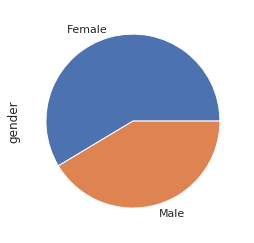

In [26]:
Stroke_df['gender'].value_counts().plot(kind='pie');

We can see a slightly unbalanced dataset. We have slightly more data on the female participants compared to males.

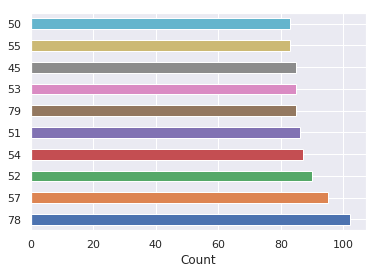

In [27]:
Stroke_df['age'].value_counts()[:10].plot(kind='barh')
plt.xlabel("Count")
plt.show();

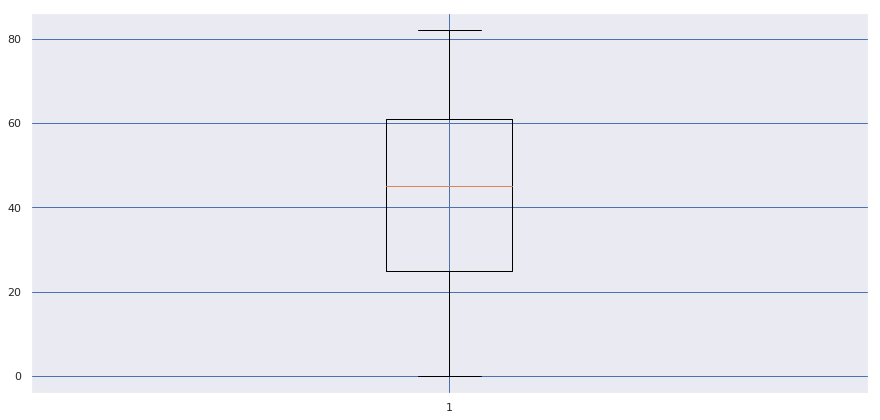

In [28]:
plt.figure(figsize=(15,7))
plt.boxplot(Stroke_df.age)
plt.yscale('linear')
plt.grid(b=True, which='major', color='b', linestyle='-')
plt.grid(b=True, which='minor', color='r', linestyle='--')
plt.show()

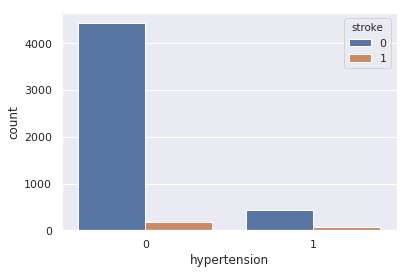

In [29]:
sns.countplot(x='hypertension',data=Stroke_df,hue='stroke');

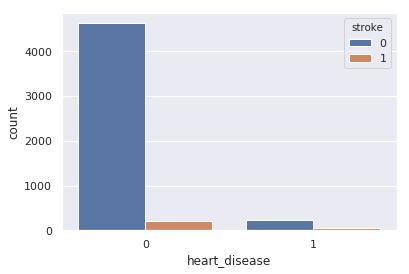

In [30]:
sns.countplot(x='heart_disease',data=Stroke_df,hue='stroke');

In [31]:
Stroke_df['ever_married'].value_counts()

Yes    3353
No     1756
Name: ever_married, dtype: int64

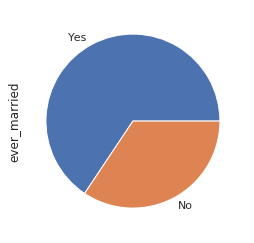

In [32]:
Stroke_df['ever_married'].value_counts().plot(kind='pie');

In [33]:
Stroke_df['work_type'].value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

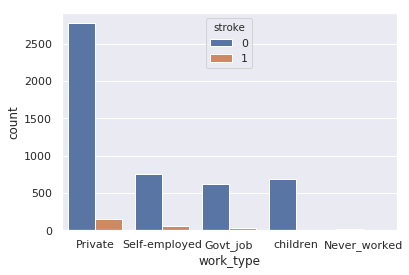

In [34]:
sns.countplot(x='work_type',data=Stroke_df[((Stroke_df['work_type']=='Private')|(Stroke_df['work_type']=='Self-employed')|(Stroke_df['work_type']=='children')|
                                               (Stroke_df['work_type']=='Govt_job')|(Stroke_df['work_type']=='Never_worked'))],hue='stroke');

In [35]:
Stroke_df['Residence_type'].value_counts()

Urban    2596
Rural    2513
Name: Residence_type, dtype: int64

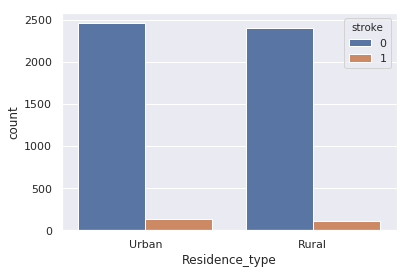

In [36]:
sns.countplot(x='Residence_type',data=Stroke_df[((Stroke_df['Residence_type']=='Urban')|(Stroke_df['Residence_type']=='Rural'))],hue='stroke');

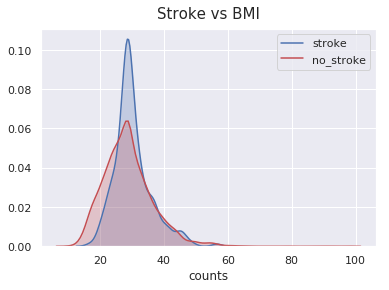

In [37]:

ax1 = sns.kdeplot(Stroke_df[Stroke_df['stroke'] == 1].bmi,shade = True, label = 'stroke' ,color ='b')
ax2 = sns.kdeplot(Stroke_df[Stroke_df['stroke'] == 0].bmi , shade = True, label = 'no_stroke', color = 'r')
ax1.set_xlabel('counts')
ax1.set_title('Stroke vs BMI',size = 15, y = 1.02)
plt.show()

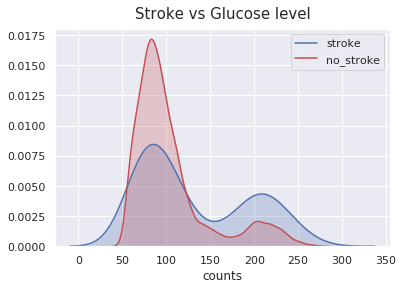

In [38]:

ax1 = sns.kdeplot(Stroke_df[Stroke_df['stroke'] == 1].avg_glucose_level,shade = True, label = 'stroke' ,color ='b')
ax2 = sns.kdeplot(Stroke_df[Stroke_df['stroke'] == 0].avg_glucose_level , shade = True, label = 'no_stroke', color = 'r')
ax1.set_xlabel('counts')
ax1.set_title('Stroke vs Glucose level',size = 15, y = 1.02)
plt.show()

In [39]:
Stroke_df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

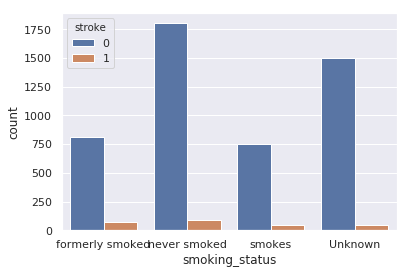

In [40]:
sns.countplot(x='smoking_status',data=Stroke_df[((Stroke_df['smoking_status']=='never smoked')|(Stroke_df['smoking_status']=='Unknown')|(Stroke_df['smoking_status']=='formerly smoked')|
                                               (Stroke_df['smoking_status']=='formerly smoked')|(Stroke_df['smoking_status']=='smokes'))],hue='stroke');

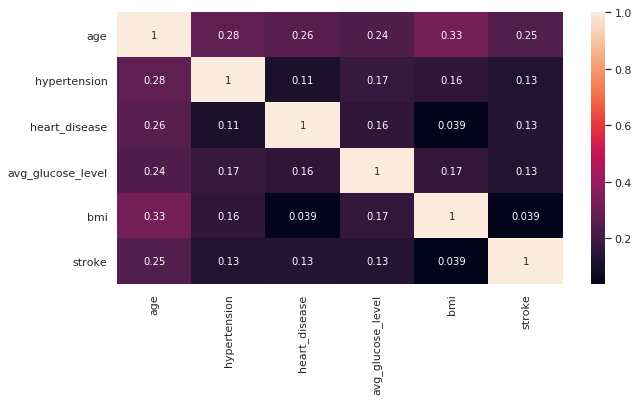

In [41]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.subplots(figsize=(10,5))
sn.heatmap(corr_matrix, annot=True)
plt.show()

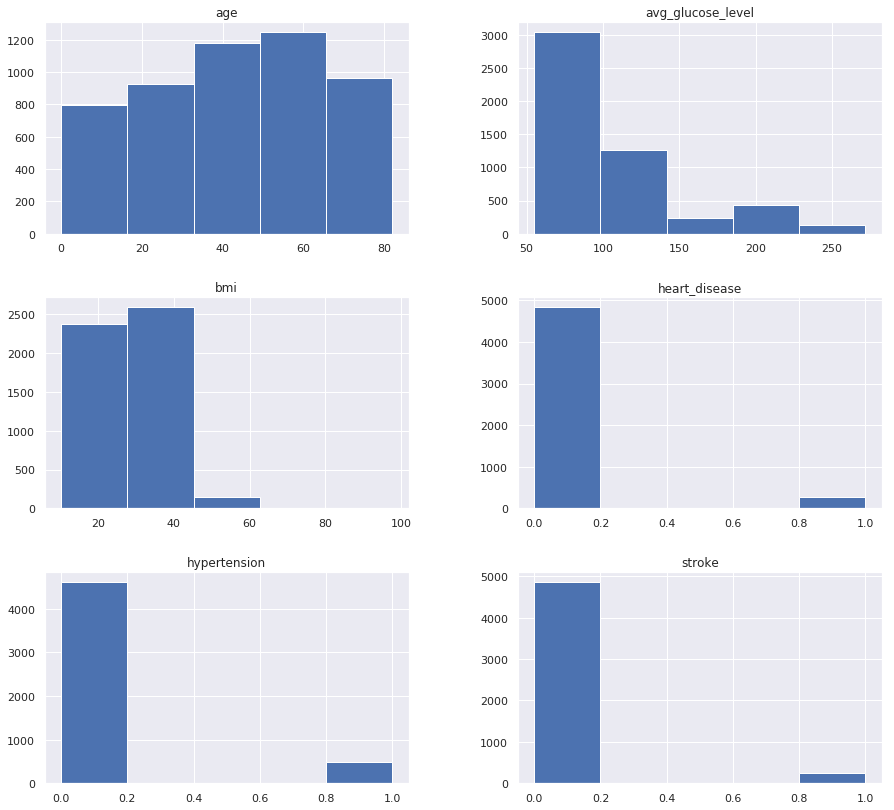

In [42]:
Stroke_df.hist(bins=5,figsize=(15, 14))
plt.show()

In [43]:
Stroke_df.describe

<bound method NDFrame.describe of       gender  age  hypertension  heart_disease ever_married      work_type  \
0       Male   67             0              1          Yes        Private   
1     Female   61             0              0          Yes  Self-employed   
2       Male   80             0              1          Yes        Private   
3     Female   49             0              0          Yes        Private   
4     Female   79             1              0          Yes  Self-employed   
5       Male   81             0              0          Yes        Private   
6       Male   74             1              1          Yes        Private   
7     Female   69             0              0           No        Private   
8     Female   59             0              0          Yes        Private   
9     Female   78             0              0          Yes        Private   
10    Female   81             1              0          Yes        Private   
11    Female   61             

In [44]:
#if label encoder (but the categorical data is not ordinal in nature)
from sklearn.preprocessing import LabelEncoder
columns= ['gender','ever_married', 'work_type','Residence_type','smoking_status']
label_encoder = LabelEncoder()
for i in columns:
    Stroke_df[i] = label_encoder .fit_transform(Stroke_df[i])

In [45]:
#Encode categorical variables to run models

Stroke_df_with_dummies = pd.get_dummies(data = Stroke_df, columns = ['gender','ever_married', 'work_type','Residence_type','smoking_status'], 
                                      prefix = ['gender','ever_married', 'work_type','Residence_type','smoking_status'] )
Stroke_df_with_dummies.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_0,gender_1,ever_married_0,ever_married_1,...,work_type_1,work_type_2,work_type_3,work_type_4,Residence_type_0,Residence_type_1,smoking_status_0,smoking_status_1,smoking_status_2,smoking_status_3
0,67,0,1,228.69,36.600000,1,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0
1,61,0,0,202.21,28.893237,1,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
2,80,0,1,105.92,32.500000,1,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
3,49,0,0,171.23,34.400000,1,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
4,79,1,0,174.12,24.000000,1,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0


In [46]:
Stroke_df1=(Stroke_df_with_dummies-Stroke_df_with_dummies.min())/(Stroke_df_with_dummies.max()-Stroke_df_with_dummies.min())

In [47]:
Stroke_df1.head(5)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_0,gender_1,ever_married_0,ever_married_1,...,work_type_1,work_type_2,work_type_3,work_type_4,Residence_type_0,Residence_type_1,smoking_status_0,smoking_status_1,smoking_status_2,smoking_status_3
0,0.817073,0.0,1.0,0.801265,0.301260,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.743902,0.0,0.0,0.679023,0.212981,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.975610,0.0,1.0,0.234512,0.254296,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.597561,0.0,0.0,0.536008,0.276060,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.963415,1.0,0.0,0.549349,0.156930,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [48]:
Stroke_df1.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_0,gender_1,ever_married_0,ever_married_1,...,work_type_1,work_type_2,work_type_3,work_type_4,Residence_type_0,Residence_type_1,smoking_status_0,smoking_status_1,smoking_status_2,smoking_status_3
age,1.000000,0.276273,0.263649,0.238212,0.326186,0.245109,0.027855,-0.027855,-0.679141,0.679141,...,-0.078560,0.117149,0.327861,-0.634997,-0.014019,0.014019,-0.378774,0.237354,0.119479,0.073221
hypertension,0.276273,1.000000,0.108292,0.174540,0.160147,0.127891,-0.021223,0.021223,-0.164187,0.164187,...,-0.021612,-0.005358,0.115417,-0.129535,0.007980,-0.007980,-0.141551,0.059022,0.065018,0.031213
heart_disease,0.263649,0.108292,1.000000,0.161907,0.038862,0.134905,-0.085685,0.085685,-0.114601,0.114601,...,-0.015715,0.000068,0.086742,-0.091654,-0.003045,0.003045,-0.066765,0.066938,-0.021893,0.044030
avg_glucose_level,0.238212,0.174540,0.161907,1.000000,0.168910,0.131991,-0.054722,0.054722,-0.155329,0.155329,...,-0.014665,0.016451,0.062770,-0.102195,0.004783,-0.004783,-0.095035,0.067796,0.024011,0.017716
bmi,0.326186,0.160147,0.038862,0.168910,1.000000,0.038912,0.025606,-0.025606,-0.335563,0.335563,...,-0.028612,0.204055,0.070756,-0.442945,0.000288,-0.000288,-0.265094,0.104674,0.106107,0.085516
stroke,0.245109,0.127891,0.134905,0.131991,0.038912,1.000000,-0.009081,0.009081,-0.108299,0.108299,...,-0.014885,0.011927,0.062150,-0.083888,-0.015415,0.015415,-0.055924,0.064683,-0.004163,0.008920
gender_0,0.027855,-0.021223,-0.085685,-0.054722,0.025606,-0.009081,1.000000,-1.000000,-0.030171,0.030171,...,-0.011486,0.032502,0.026045,-0.089226,-0.006105,0.006105,-0.059557,-0.043121,0.098952,-0.011408
gender_1,-0.027855,0.021223,0.085685,0.054722,-0.025606,0.009081,-1.000000,1.000000,0.030171,-0.030171,...,0.011486,-0.032502,-0.026045,0.089226,0.006105,-0.006105,0.059557,0.043121,-0.098952,0.011408
ever_married_0,-0.679141,-0.164187,-0.114601,-0.155329,-0.335563,-0.108299,-0.030171,0.030171,1.000000,-1.000000,...,0.090873,-0.154104,-0.192637,0.544658,0.005988,-0.005988,0.332335,-0.171960,-0.102663,-0.105132
ever_married_1,0.679141,0.164187,0.114601,0.155329,0.335563,0.108299,0.030171,-0.030171,-1.000000,1.000000,...,-0.090873,0.154104,0.192637,-0.544658,-0.005988,0.005988,-0.332335,0.171960,0.102663,0.105132


In [49]:
corr_matrix = Stroke_df1.corr()
print(corr_matrix["stroke"].sort_values(ascending=False))

stroke               1.000000
age                  0.245109
heart_disease        0.134905
avg_glucose_level    0.131991
hypertension         0.127891
ever_married_1       0.108299
smoking_status_1     0.064683
work_type_3          0.062150
bmi                  0.038912
Residence_type_1     0.015415
work_type_2          0.011927
gender_1             0.009081
smoking_status_3     0.008920
work_type_0          0.002660
smoking_status_2    -0.004163
gender_0            -0.009081
work_type_1         -0.014885
Residence_type_0    -0.015415
smoking_status_0    -0.055924
work_type_4         -0.083888
ever_married_0      -0.108299
Name: stroke, dtype: float64


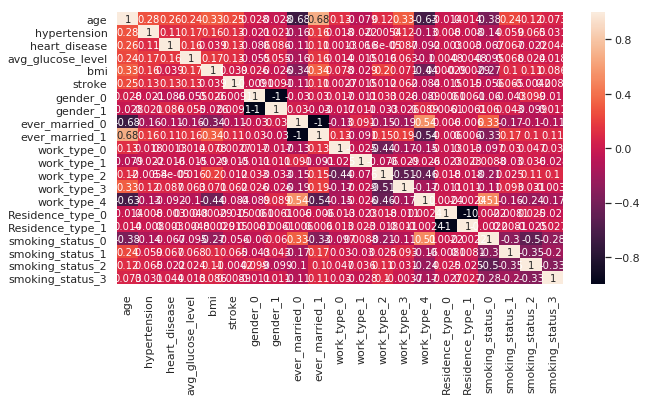

In [50]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.subplots(figsize=(10,5))
sn.heatmap(corr_matrix, annot=True)
plt.show()

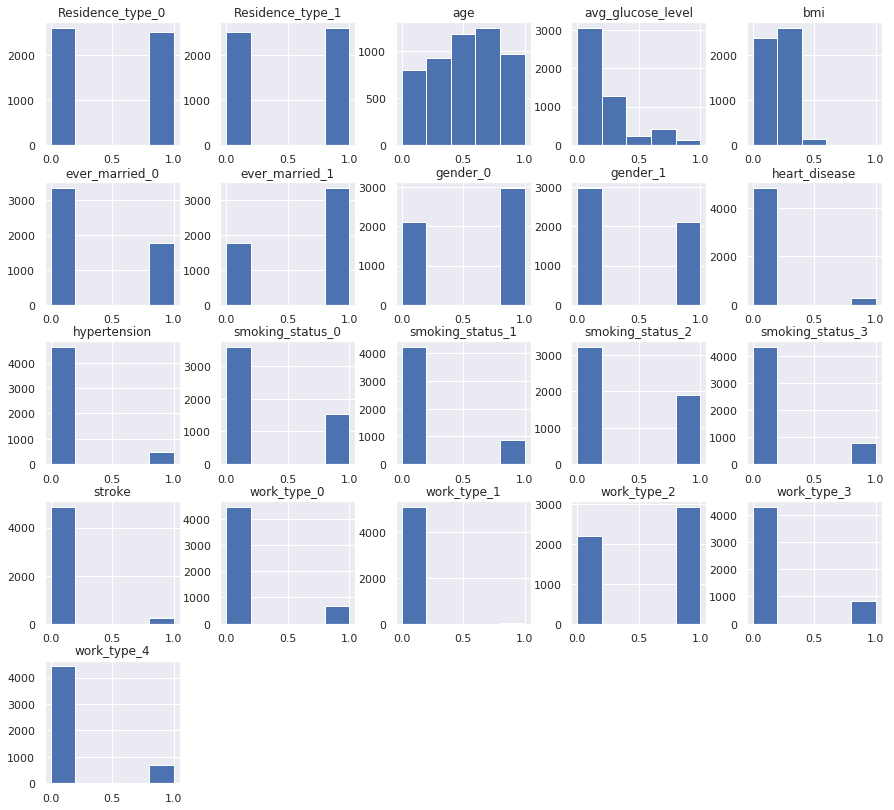

In [51]:
Stroke_df1.hist(bins=5,figsize=(15, 14))
plt.show()

The above histograms give an overview of the Stroke dataset. Whilst most of the data points are spread across all age groups. There is a skewed representation for the other attributes. Most of the cases do not have hyper tension , heart disease or stroke which may pose as a challenge in the data analysis.

## Set target variable 

We aim predict the stroke occurrence rates among people. Hence, our target variable will be set is "stroke", if the person has suffered from stroke or not.In this part, we will visualize some key features and show statistical relationship with variable of stroke. This provides an overview of the given dataset and enhances our understanding of data.

In [52]:
y= Stroke_df1['stroke']

In [53]:
Stroke_df1['stroke'].value_counts()

0.0    4860
1.0     249
Name: stroke, dtype: int64

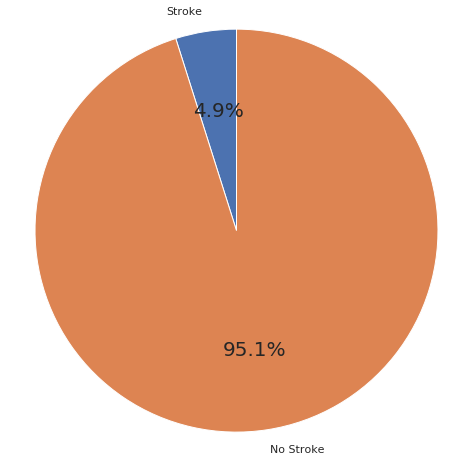

In [54]:
Labels = 'Stroke', 'No Stroke'
sizes = [249, 4860]

fig1, ax1 = plt.subplots(figsize=(8,8))
_ = ax1.pie(sizes, labels=  Labels, autopct='%1.1f%%',
         startangle=90, textprops={'fontsize': 20})
_ = ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

_ = plt.show()

We have a case of unbalanced target class (stroke cases)  with only 4.9%. We may apply resampling to inflate the number of cases that were dianised with stroke to have a balanced dataset to run the analsis.

In [55]:

from sklearn.utils import resample

In [56]:

# Separate majority and minority classes
Stroke_majority = Stroke_df1[Stroke_df1['stroke'] == 0]
Stroke_minority = Stroke_df1[Stroke_df1['stroke'] == 1]
 
# Upsample minority class
Stroke_minority_upsampled = resample(Stroke_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=1021,    # to match majority class
                                 random_state=1) # reproducible results
 

In [57]:
# Combine majority class with upsampled minority class
Stroke_upsampled = pd.concat([Stroke_majority, Stroke_minority_upsampled])
 # Display new class counts
Stroke_upsampled.stroke.value_counts()

0.0    4860
1.0    1021
Name: stroke, dtype: int64

In [58]:
y=Stroke_upsampled['stroke'].sample(n=5109)

In [59]:
y.shape

(5109,)

In [60]:
Stroke_upsampled['stroke'].value_counts()

0.0    4860
1.0    1021
Name: stroke, dtype: int64

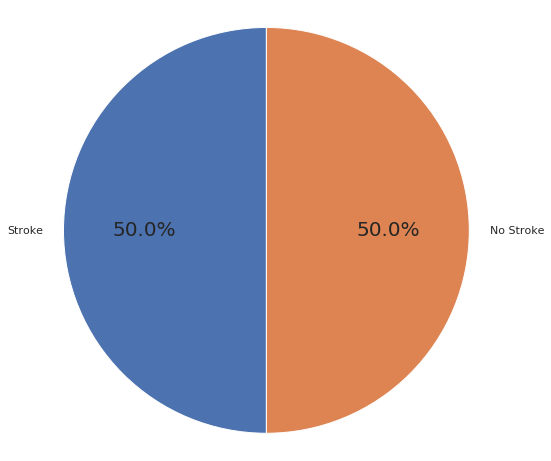

In [61]:
Labels = 'Stroke', 'No Stroke'
sizes = [4860, 4860]

fig1, ax1 = plt.subplots(figsize=(8,8))
_ = ax1.pie(sizes, labels=  Labels, autopct='%1.1f%%',
         startangle=90, textprops={'fontsize': 20})
_ = ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

_ = plt.show()

In [62]:
Stroke_upsampled

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_0,gender_1,ever_married_0,ever_married_1,...,work_type_1,work_type_2,work_type_3,work_type_4,Residence_type_0,Residence_type_1,smoking_status_0,smoking_status_1,smoking_status_2,smoking_status_3
249,0.036585,0.0,0.0,0.184655,0.088202,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
250,0.707317,1.0,0.0,0.151602,0.331042,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
251,0.097561,0.0,0.0,0.257455,0.083620,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
252,0.853659,0.0,0.0,0.064260,0.293242,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
253,0.170732,0.0,0.0,0.490075,0.100802,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
254,0.573171,0.0,0.0,0.719370,0.455899,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
255,0.634146,0.0,0.0,0.103730,0.084765,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
256,0.914634,0.0,1.0,0.869772,0.191294,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
257,0.390244,0.0,0.0,0.104099,0.252005,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
258,0.902439,1.0,0.0,0.695781,0.507446,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


 We will try to run the models in parallel with different resampling proportions of target variable, to see the performance metrics.

## Set predictor variables 

In [63]:
# Take all columns except target as predictor columns
predictor_columns = [c for c in Stroke_upsampled.columns if c != 'stroke']
# Load the dataset as a pandas data frame
X = pd.DataFrame(Stroke_upsampled, columns = predictor_columns)
y=Stroke_upsampled['stroke']

In [64]:
X.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_0,gender_1,ever_married_0,ever_married_1,work_type_0,work_type_1,work_type_2,work_type_3,work_type_4,Residence_type_0,Residence_type_1,smoking_status_0,smoking_status_1,smoking_status_2,smoking_status_3
249,0.036585,0.0,0.0,0.184655,0.088202,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
250,0.707317,1.0,0.0,0.151602,0.331042,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
251,0.097561,0.0,0.0,0.257455,0.083620,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
252,0.853659,0.0,0.0,0.064260,0.293242,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
253,0.170732,0.0,0.0,0.490075,0.100802,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [65]:
print_categories('gender')

gender :  Numerical
age :  Numerical
hypertension :  Numerical
heart_disease :  Numerical
ever_married :  Numerical
work_type :  Numerical
Residence_type :  Numerical
avg_glucose_level :  Numerical
bmi :  Numerical
smoking_status :  Numerical
stroke :  Numerical


In [66]:
 Stroke_df1.head(5)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_0,gender_1,ever_married_0,ever_married_1,...,work_type_1,work_type_2,work_type_3,work_type_4,Residence_type_0,Residence_type_1,smoking_status_0,smoking_status_1,smoking_status_2,smoking_status_3
0,0.817073,0.0,1.0,0.801265,0.301260,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.743902,0.0,0.0,0.679023,0.212981,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.975610,0.0,1.0,0.234512,0.254296,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.597561,0.0,0.0,0.536008,0.276060,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.963415,1.0,0.0,0.549349,0.156930,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


# Feature Selection

In our project, we will be running our models on features identified by PCA. We will compare the performance metrics of supervised machine learning and deep learning methods on the PCA components.

In [67]:
from sklearn.model_selection import train_test_split

# Take all columns except target as predictor columns
predictor_columns = [c for c in Stroke_upsampled.columns if c != 'stroke']
# Load the dataset as a pandas data frame
X = pd.DataFrame(Stroke_upsampled, columns = predictor_columns)

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Feature Selection Method (A)- Forward Feature Selection 

In [68]:
## Flag intermediate output
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
show_steps = True   # for testing/debugging
# show_steps = False  # without showing steps

In [69]:
## Use Forward Feature Selection to pick a good model

# start with no predictors
included = []
# keep track of model and parameters
best = {'feature': '', 'r2': 0, 'a_r2': 0}
# create a model object to hold the modelling parameters
model = LinearRegression() # create a model for Linear Regression
# get the number of cases in the test data
n = X_test.shape[0]

while True:
    changed = False
    
    if show_steps:
        print('') 

    # list the features to be evaluated
    excluded = list(set(X.columns) - set(included))
    
    if show_steps:
        print('(Step) Excluded = %s' % ', '.join(excluded))  

    # for each remaining feature to be evaluated
    for new_column in excluded:
        
        if show_steps:
            print('(Step) Trying %s...' % new_column)
            print('(Step) - Features = %s' % ', '.join(included + [new_column]))

        # fit the model with the Training data
        fit = model.fit (X_train[included + [new_column]], y_train)# fit a model; consider which predictors should be included
        # calculate the score (R^2 for Regression)
        r2 = fit.score (X_train[included + [new_column]], y_train) # calculate the score
        # number of predictors in this model
        k = len(included) + 1
        # calculate the adjusted R^2
        adjusted_r2 = 1- ( ( (1-r2) * (n-1) )/(n-k-1) )# calculate the Adjusted R^2

        if show_steps:
            print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' % 
                  (adjusted_r2, best['a_r2']))

        # if model improves
        if adjusted_r2 > best['a_r2']:
            # record new parameters
            best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
            # flag that found a better model
            changed = True
            if show_steps:
                print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' % 
                    (best['feature'], best['r2'], best['a_r2']))
    # END for

    # if found a better model after testing all remaining features
    if changed:
        # update control details
        included.append(best['feature'])
        excluded = list(set(excluded) - set(best['feature']))
        
        print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % (best['feature'], best['r2'], best['a_r2']))
    else:
        # terminate if no better model
        break

print('')
print('Resulting features:')
print(', '.join(included))


(Step) Excluded = heart_disease, gender_0, smoking_status_0, avg_glucose_level, gender_1, smoking_status_3, work_type_4, Residence_type_1, hypertension, work_type_3, ever_married_0, bmi, smoking_status_1, smoking_status_2, age, work_type_0, ever_married_1, work_type_1, Residence_type_0, work_type_2
(Step) Trying heart_disease...
(Step) - Features = heart_disease
(Step) - Adjusted R^2: This = 0.040; Best = 0.000
(Step) - New Best!   : Feature = heart_disease; R^2 = 0.041; Adjusted R^2 = 0.040
(Step) Trying gender_0...
(Step) - Features = gender_0
(Step) - Adjusted R^2: This = -0.001; Best = 0.040
(Step) Trying smoking_status_0...
(Step) - Features = smoking_status_0
(Step) - Adjusted R^2: This = 0.009; Best = 0.040
(Step) Trying avg_glucose_level...
(Step) - Features = avg_glucose_level
(Step) - Adjusted R^2: This = 0.046; Best = 0.040
(Step) - New Best!   : Feature = avg_glucose_level; R^2 = 0.047; Adjusted R^2 = 0.046
(Step) Trying gender_1...
(Step) - Features = gender_1
(Step) - Ad

In [70]:
predictor_columns = ['age', 'work_type_4', 'avg_glucose_level', 'ever_married_0', 'heart_disease', 'hypertension', 'bmi', 'work_type_2', 'smoking_status_2', 'gender_1']

In [71]:
X = Stroke_upsampled[predictor_columns]
X.head()

,age,work_type_4,avg_glucose_level,ever_married_0,heart_disease,hypertension,bmi,work_type_2,smoking_status_2,gender_1
249,0.036585,1.0,0.184655,1.0,0.0,0.0,0.088202,0.0,0.0,1.0
250,0.707317,0.0,0.151602,0.0,0.0,1.0,0.331042,1.0,1.0,1.0
251,0.097561,0.0,0.257455,1.0,0.0,0.0,0.083620,1.0,0.0,0.0
252,0.853659,0.0,0.064260,0.0,0.0,0.0,0.293242,1.0,0.0,0.0
253,0.170732,0.0,0.490075,1.0,0.0,0.0,0.100802,0.0,0.0,1.0


In [72]:
y=Stroke_upsampled['stroke']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

# Machine Learning - Resulting features from forward feature selection

## Logistic Regession

In [74]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=7, solver='liblinear')
logreg.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=7, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [75]:
from sklearn.model_selection import cross_val_score
lr_scores_train = cross_val_score(logreg, X_train, y_train, cv=10, scoring='accuracy')
print(lr_scores_train.mean())

0.8358786912628695


In [76]:
lr_scores_test = cross_val_score(logreg, X_test, y_test, cv=10, scoring='accuracy')

print(lr_scores_test.mean())

0.8428460649796641


In [77]:
y_pred = logreg.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.91       985
         1.0       0.50      0.29      0.37       192

   micro avg       0.84      0.84      0.84      1177
   macro avg       0.69      0.62      0.64      1177
weighted avg       0.81      0.84      0.82      1177



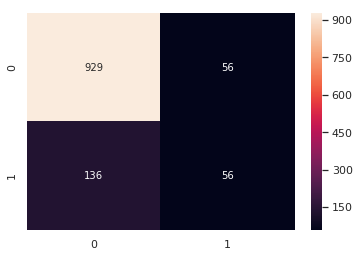

In [78]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt = 'd');

print(classification_report(y_test, y_pred))

## KNN Classifier

In [79]:
from sklearn.neighbors import KNeighborsClassifier

In [80]:
model_k = KNeighborsClassifier()
model_k.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [81]:
model_k_scores_train = cross_val_score(model_k, X_train, y_train, cv=10, scoring='accuracy')
print(model_k_scores_train.mean())

0.8713835407401458


In [82]:
model_k_scores_test = cross_val_score(model_k, X_test, y_test, cv=10, scoring='accuracy')

print(model_k_scores_test.mean())

0.8173996326040195


In [83]:
y_pred = model_k.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.95      0.88      0.91       985
         1.0       0.54      0.76      0.63       192

   micro avg       0.86      0.86      0.86      1177
   macro avg       0.75      0.82      0.77      1177
weighted avg       0.88      0.86      0.87      1177



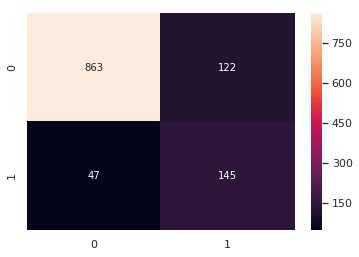

In [84]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt = 'd');

print(classification_report(y_test, y_pred))

## SVM 

In [85]:
from sklearn import svm
from sklearn.svm import SVC



In [86]:
svc_model = SVC(kernel = 'linear', probability = True)
svc_model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [87]:
svc_model_scores_train = cross_val_score(svc_model, X_train, y_train, cv=10, scoring='accuracy')
print(svc_model_scores_train.mean())

0.8237672902018474


In [88]:
svc_model_scores_test = cross_val_score(svc_model, X_test, y_test, cv=10, scoring='accuracy')

print(svc_model_scores_test.mean())

0.8283952172785671


In [89]:
y_pred = svc_model.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91       985
         1.0       0.00      0.00      0.00       192

   micro avg       0.84      0.84      0.84      1177
   macro avg       0.42      0.50      0.46      1177
weighted avg       0.70      0.84      0.76      1177



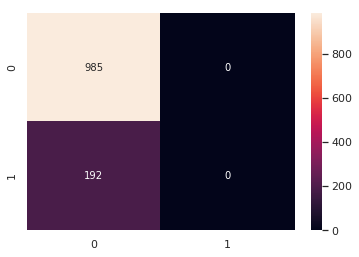

In [90]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt = 'd');

print(classification_report(y_test, y_pred))

## Random Forest 

In [91]:
from sklearn.ensemble import RandomForestClassifier
# Create the model 
model_rf = RandomForestClassifier()

In [92]:
model_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [93]:
model_rf_scores_train = cross_val_score(model_rf, X_train, y_train, cv=10, scoring='accuracy')
print(model_rf_scores_train.mean())

0.9723629832561391


In [94]:
model_rf_scores_test = cross_val_score(model_rf, X_test, y_test, cv=10, scoring='accuracy')

print(model_rf_scores_test.mean())

0.905632796360613


In [95]:
y_pred = model_rf.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98       985
         1.0       0.89      0.96      0.92       192

   micro avg       0.97      0.97      0.97      1177
   macro avg       0.94      0.97      0.95      1177
weighted avg       0.98      0.97      0.97      1177



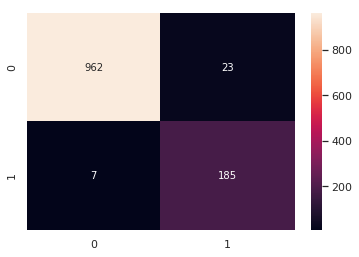

In [96]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt = 'd');

print(classification_report(y_test, y_pred))

## Boosting 

In [97]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
svc=SVC(probability=True, kernel='linear')

In [98]:
ada_model =AdaBoostClassifier()

ada_model.fit(X_train, y_train)



AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [99]:
ada_model_scores_train = cross_val_score(ada_model, X_train, y_train, cv=10, scoring='accuracy')
print(ada_model_scores_train.mean())

0.8397121116197035


In [100]:
ada_model_scores_test = cross_val_score(ada_model, X_test, y_test, cv=10, scoring='accuracy')

print(ada_model_scores_test.mean())

0.842810092311588


In [101]:
y_pred = ada_model.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.91       985
         1.0       0.50      0.37      0.43       192

   micro avg       0.84      0.84      0.84      1177
   macro avg       0.69      0.65      0.67      1177
weighted avg       0.82      0.84      0.83      1177



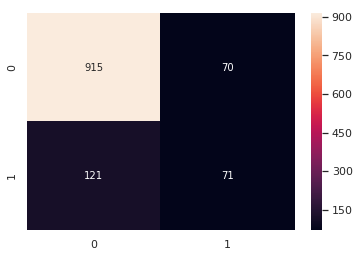

In [102]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt = 'd');

print(classification_report(y_test, y_pred))

## Evaluation of Machine Learning Results- Training sets 

In [103]:

#consolidation of classifiers

logreg = LogisticRegression(random_state=7, solver='liblinear')
logreg.fit(X_train, y_train)
model_k = KNeighborsClassifier()
model_k.fit(X_train, y_train)
svc_model = SVC(kernel = 'linear', probability = True)
svc_model.fit(X_train,y_train)
model_rf = RandomForestClassifier()
model_rf.fit(X_train,y_train)
ada_model =AdaBoostClassifier()

ada_model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [104]:
# Evaluate model against training set
def show_summary_report(actual, prediction):

    if isinstance(actual, pd.Series):
        actual = actual.values
    if actual.dtype.name == 'object':
        actual = actual.astype(int)
    if prediction.dtype.name == 'object':
        prediction = prediction.astype(int)

    accuracy_ = accuracy_score(actual, prediction)
    precision_ = precision_score(actual, prediction)
    recall_ = recall_score(actual, prediction)
    roc_auc_ = roc_auc_score(actual, prediction)

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_)
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_)
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_)
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_)
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)
    average_precision = average_precision_score(actual, prediction)
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, prediction)
    roc_auc = auc(fpr, tpr)

    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')
    
    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()
    
    return (accuracy_, precision_, recall_, roc_auc_)
#results in pd df

results = pd.DataFrame (columns = ['Model', 'Accuracy', 'Precision','Recall','ROC_AUC'])

*************
* Logistic *
*************
Accuracy : 0.8348 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.5667 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.2666 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.6115                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


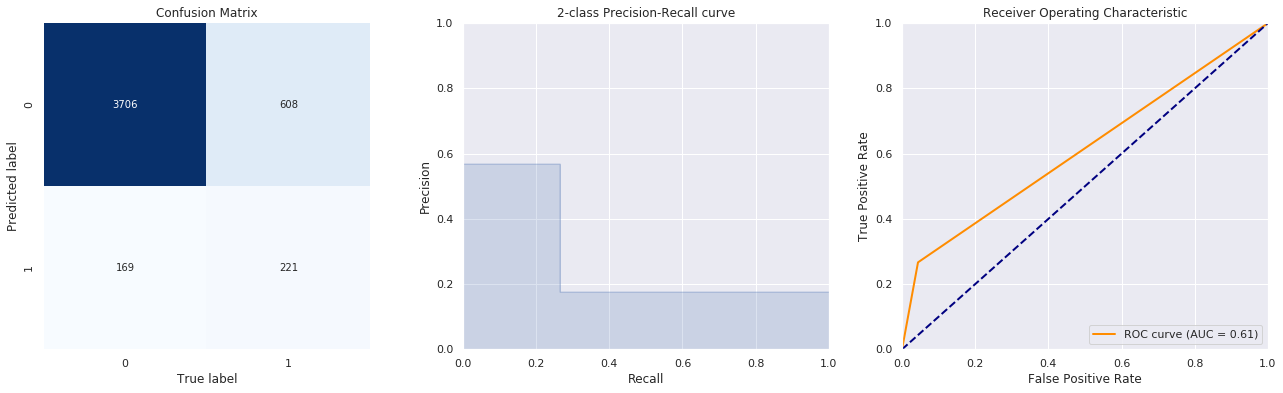

*******************
* KNN Classifier *
*******************
Accuracy : 0.9247 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7286 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9131 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9202                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


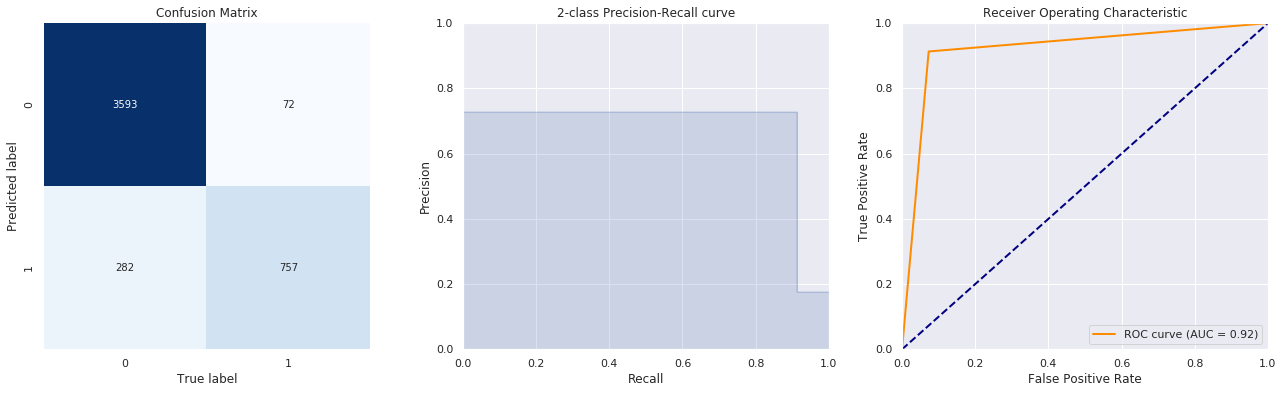

********
* SVM *
********
Accuracy : 0.8238 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.0000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.0000 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.5000                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


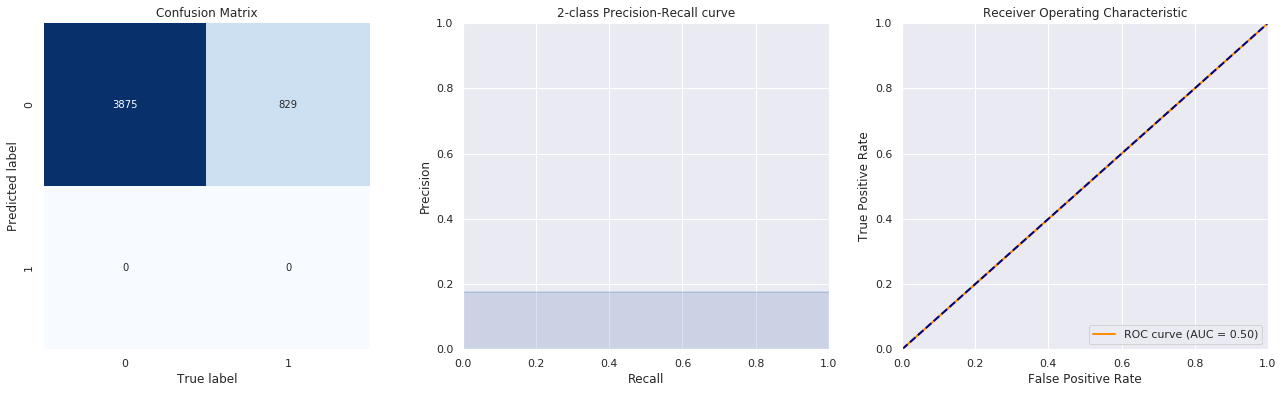

******************
* Random Forest *
******************
Accuracy : 0.9991 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9988 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9964 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9981                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


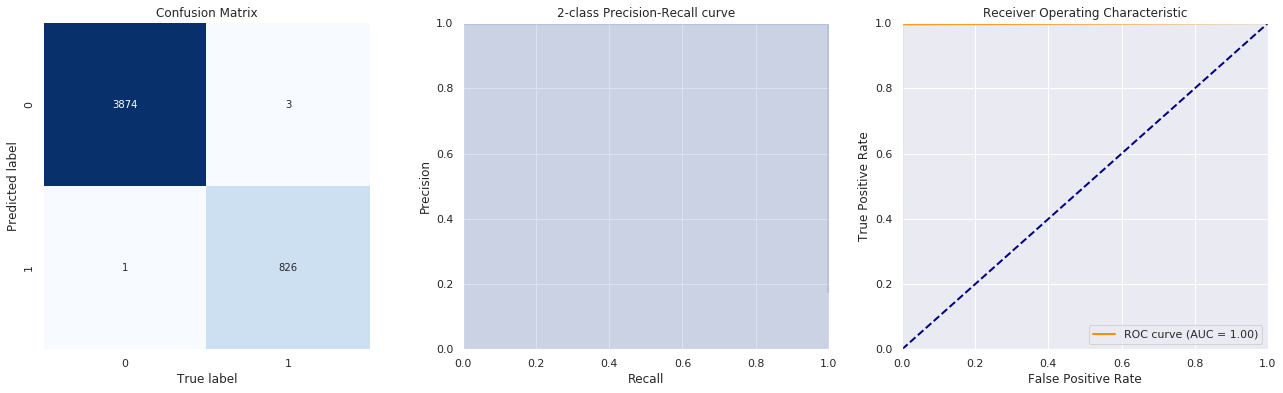

*************
* Boosting *
*************
Accuracy : 0.8410 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.5751 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.3739 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.6574                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


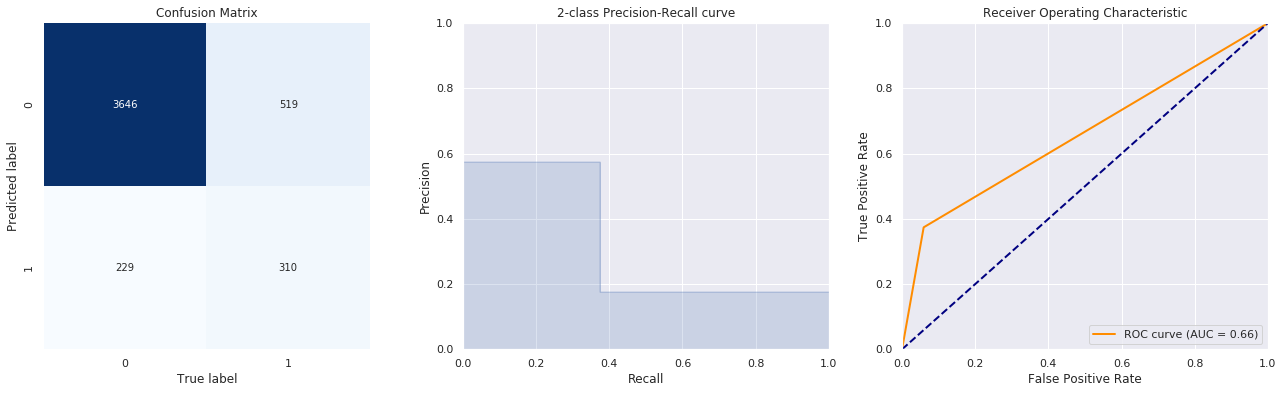

In [105]:

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
models = ['Logistic','KNN Classifier','SVM','Random Forest','Boosting']
for i, m in enumerate ([ logreg,model_k,svc_model,model_rf,ada_model]):
    print('*' * (len(models[i]) + 5))
    print('* %s *' %models[i])
    print('*' * (len(models[i]) + 5))
    predictions = m.predict(X_train)
    
    #show report
    accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_train, predictions)
    
    results.loc[i] = {'Model':models[i],
                  'Accuracy':accuracy_, 
                  'Precision': precision_, 
                  'Recall': recall_, 
                  'ROC_AUC': roc_auc_}

In [106]:
results

,Model,Accuracy,Precision,Recall,ROC_AUC
0,Logistic,0.834821,0.566667,0.266586,0.611487
1,KNN Classifier,0.924745,0.728585,0.913148,0.920187
2,SVM,0.823767,0.000000,0.000000,0.500000
3,Random Forest,0.999150,0.998791,0.996381,0.998062
4,Boosting,0.840986,0.575139,0.373945,0.657424


## Evaluation of Machine Learning results- Test sets

## Logistic Regression 

In [107]:
predictions1 = logreg.predict(X_test)

Accuracy : 0.8369 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.5000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.2917 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.6174                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


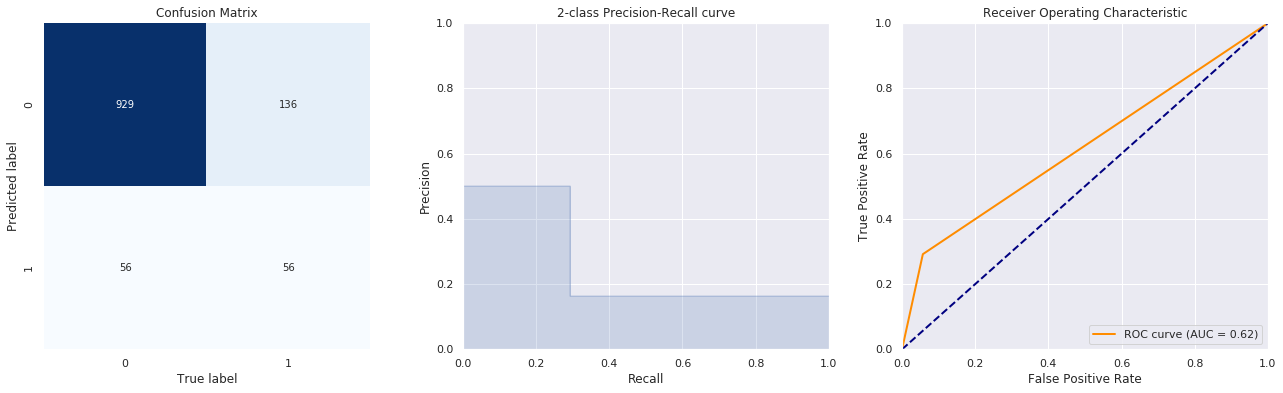

In [108]:
accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_test, predictions1)

## KNN Classifier 

In [109]:
predictions2 = model_k.predict(X_test)

Accuracy : 0.8564 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.5431 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7552 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8157                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


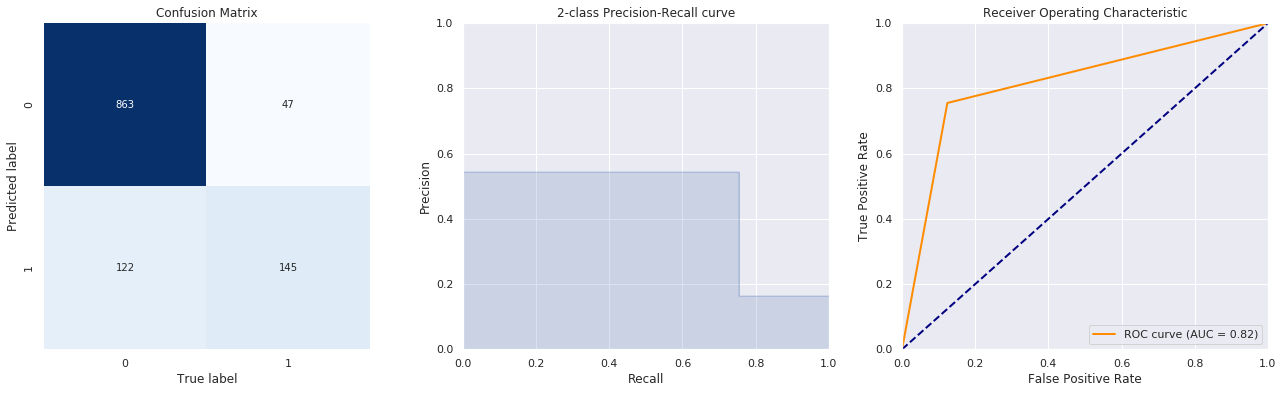

In [110]:
accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_test, predictions2)

## SVM  

In [111]:
predictions3 = svc_model.predict(X_test)

Accuracy : 0.8369 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.0000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.0000 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.5000                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


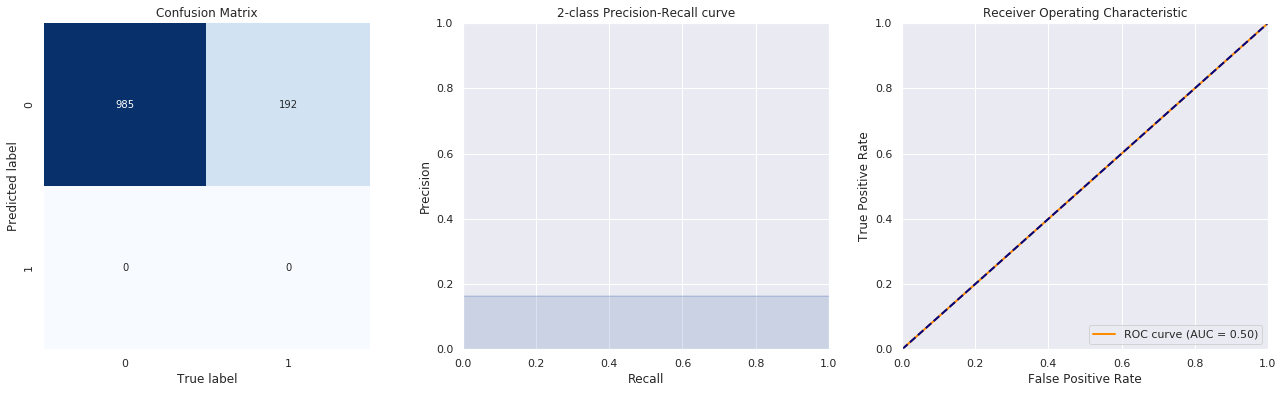

In [112]:
accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_test, predictions3)

## Random Forest 

In [113]:
predictions4 = model_rf.predict(X_test)

Accuracy : 0.9762 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8905 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9740 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9753                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


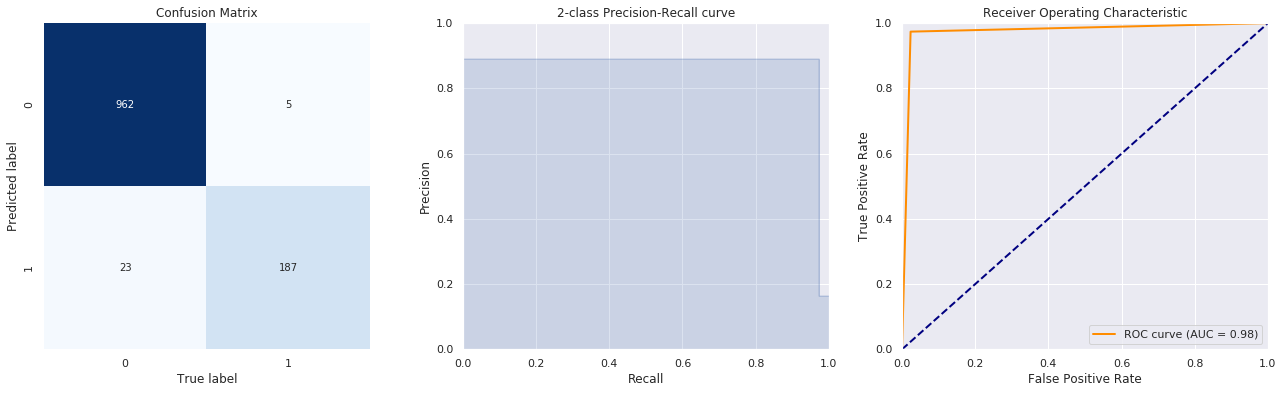

In [114]:
accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_test, predictions4)

## Boosting 

In [115]:
predictions5 = ada_model.predict(X_test)

Accuracy : 0.8377 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.5035 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.3698 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.6494                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


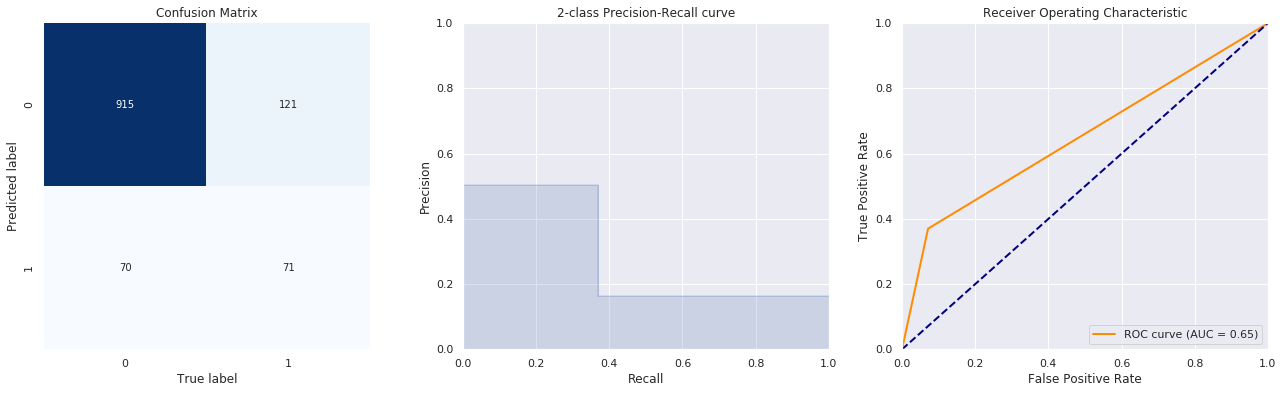

In [116]:
accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_test, predictions5)

## Hyper parameter tuning- Gridsearch CV for forward feature selection dataset 

### (1) Logistic Regression 

In [117]:
from sklearn.model_selection import GridSearchCV
lr_params = {
    'penalty': ['l1','l2'],
    'C': [1, 10, 100]
}
search = GridSearchCV(logreg,lr_params, cv=5)
search.fit(X_train, y_train)



GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=7, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 10, 100], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [118]:
best_logreg = search.best_estimator_
print(search.best_params_)

{'C': 10, 'penalty': 'l2'}


In [119]:

grid_values = {'penalty': ['l2'], 'C': [10]}
grid_log_acc = GridSearchCV(logreg, param_grid = grid_values,scoring = 'accuracy')
grid_log_acc.fit(X_train, y_train)

y_pred = grid_log_acc.predict(X_train)

accuracy_score_train = accuracy_score(y_train, y_pred)

accuracy_score_train

0.8356717687074829

In [120]:
y_pred_acc = grid_log_acc.predict(X_test)

accuracy_score_test = accuracy_score(y_test, y_pred_acc)

accuracy_score_test

0.8385726423109601

In [121]:
cm = confusion_matrix(y_test, y_pred_acc)

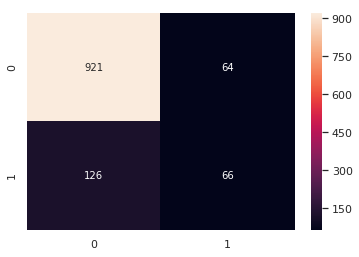

In [122]:
sns.heatmap(cm, annot=True, fmt= "d");

In [123]:
def plot_roc_curve (X_test,y_test):
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
    preds = grid_log_acc.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
    fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
    roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc = "lower right")
    plt.show()

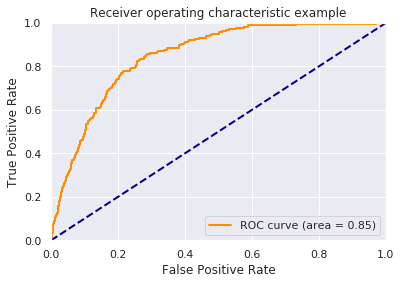

In [124]:
plot_roc_curve (X_train,y_train)

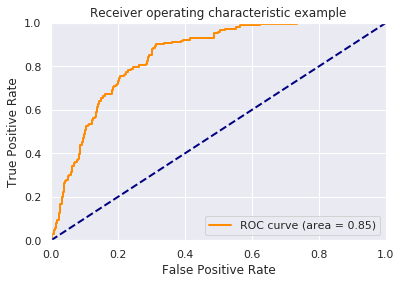

In [125]:
plot_roc_curve (X_test,y_test)

### (2) KNN Classifier

In [126]:
parameters_KNN = {
    'n_neighbors': (1,10),
    'leaf_size': (20,40),
    'p': (1,2)}
search = GridSearchCV(model_k,parameters_KNN, cv=5)
search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': (1, 10), 'leaf_size': (20, 40), 'p': (1, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [127]:
best_knn = search.best_estimator_
print(search.best_params_)

{'n_neighbors': 1, 'leaf_size': 20, 'p': 2}


In [128]:
grid_values = {'p': [2], 'n_neighbors': [1], 'leaf_size': [20]}
grid_knn_acc = GridSearchCV(model_k, param_grid = grid_values,scoring = 'accuracy')
grid_knn_acc.fit(X_train, y_train)

y_pred = grid_knn_acc.predict(X_train)

accuracy_score_train = accuracy_score(y_train, y_pred)

accuracy_score_train

1.0

In [129]:
y_pred_acc = grid_knn_acc.predict(X_test)

accuracy_score_test = accuracy_score(y_test, y_pred_acc)

accuracy_score_test

0.9422259983007647

In [130]:
cm = confusion_matrix(y_test, y_pred_acc)

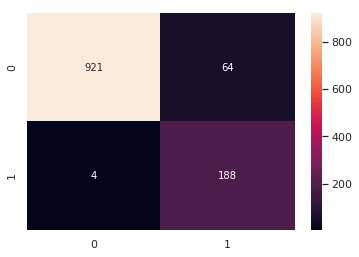

In [131]:
sns.heatmap(cm, annot=True, fmt= "d");

In [132]:
def plot_roc_curve (X_test,y_test):
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
    preds = grid_knn_acc.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
    fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
    roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc = "lower right")
    plt.show()

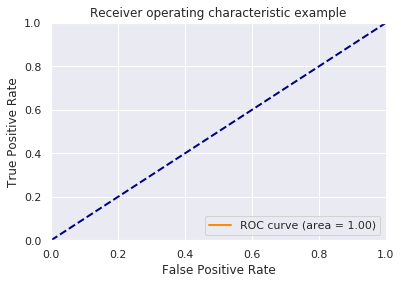

In [133]:
plot_roc_curve (X_train,y_train)

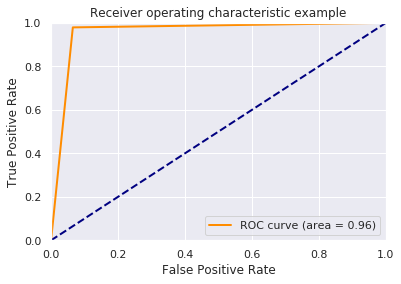

In [134]:
plot_roc_curve (X_test,y_test)

### (3) SVM 

In [135]:
svc_params = {
    'C': [1, 10, 100],
 'gamma': [0.001, 0.0001],
    'kernel': ['linear','rbf']
  
}

In [136]:
%%time
search = GridSearchCV(svc_model,svc_params, cv=5)
search.fit(X_train, y_train)


CPU times: user 4min 56s, sys: 1.24 s, total: 4min 57s
Wall time: 5min


In [137]:
best_svc = search.best_estimator_
print(search.best_params_)

{'gamma': 0.001, 'kernel': 'linear', 'C': 1}


In [138]:
best_svc = search.get_params
best_svc

<bound method BaseEstimator.get_params of GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'gamma': [0.001, 0.0001], 'kernel': ['linear', 'rbf'], 'C': [1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)>

In [139]:
grid_values = {'gamma': [0.001], 'kernel': ['linear'], 'C': [1]}
grid_svc_acc = GridSearchCV(svc_model, param_grid = grid_values,scoring = 'accuracy')
grid_svc_acc.fit(X_train, y_train)

y_pred = grid_svc_acc.predict(X_train)

accuracy_score_train = accuracy_score(y_train, y_pred)

accuracy_score_train

0.8237670068027211

In [140]:
y_pred_acc = grid_svc_acc.predict(X_test)

accuracy_score_test = accuracy_score(y_test, y_pred_acc)

accuracy_score_test

0.836873406966865

In [141]:
cm = confusion_matrix(y_test, y_pred_acc)

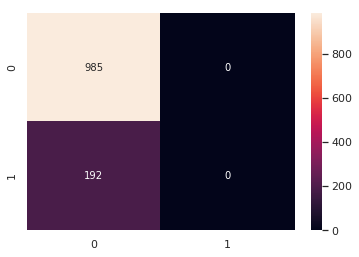

In [142]:
sns.heatmap(cm, annot=True, fmt= "d");

In [143]:
def plot_roc_curve (X_test,y_test):
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
    preds = grid_svc_acc.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
    fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
    roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc = "lower right")
    plt.show()

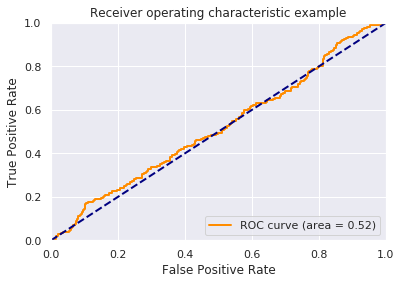

In [144]:
plot_roc_curve (X_train,y_train)

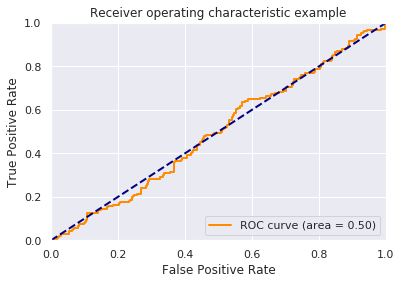

In [145]:
plot_roc_curve (X_test,y_test)

### (4) Random Forest 

In [146]:
param_grid = { 
    'n_estimators': [15],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy']
}

In [147]:
%%time

search= GridSearchCV(estimator=model_rf, param_grid=param_grid, cv= 10)
search.fit(X_train, y_train)

CPU times: user 4.93 s, sys: 98.5 ms, total: 5.03 s
Wall time: 5.08 s


In [148]:
best_rf = search.best_estimator_
print(search.best_params_)

{'criterion': 'gini', 'n_estimators': 15, 'max_features': 'auto'}


In [149]:
grid_values = {'max_features': ['log2'], 'criterion': ['entropy'], 'n_estimators': [15]}
grid_rf_acc = GridSearchCV( model_rf, param_grid = grid_values,scoring = 'accuracy')
grid_rf_acc.fit(X_train, y_train)

y_pred = grid_rf_acc.predict(X_train)

accuracy_score_train = accuracy_score(y_train, y_pred)

accuracy_score_train

0.9995748299319728

In [150]:
y_pred_acc = grid_rf_acc.predict(X_test)

accuracy_score_test = accuracy_score(y_test, y_pred_acc)

accuracy_score_test

0.9702633814783348

In [151]:
cm = confusion_matrix(y_test, y_pred_acc)

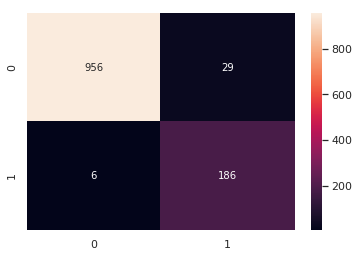

In [152]:
sns.heatmap(cm, annot=True, fmt= "d");

In [153]:
def plot_roc_curve (X_test,y_test):
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
    preds = grid_rf_acc.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
    fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
    roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc = "lower right")
    plt.show()

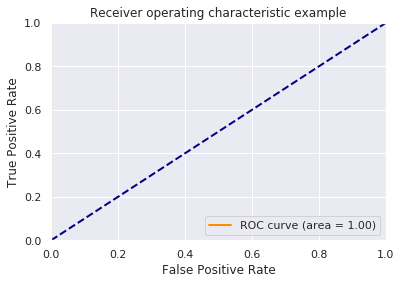

In [154]:
plot_roc_curve (X_train,y_train)

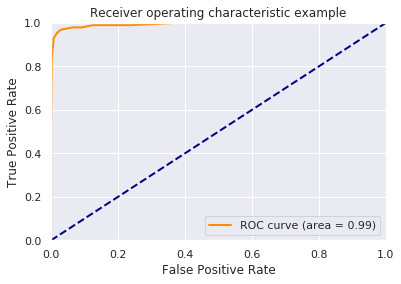

In [155]:
plot_roc_curve (X_test,y_test)

### (5) Boosting 

In [156]:
from sklearn.model_selection import GridSearchCV
params = {
     'n_estimators': np.arange(10,300,10),
     'learning_rate': [0.01, 0.05, 0.1, 1],
 }
grid_cv = GridSearchCV(AdaBoostClassifier(), param_grid= params, cv=5, n_jobs=-1)
grid_cv.fit(X_train,y_train)
grid_cv.best_params_

y_pred = grid_cv.predict(X_train)

accuracy_score_train = accuracy_score(y_train, y_pred)

accuracy_score_train

0.8560799319727891

In [157]:
y_pred_acc = grid_cv.predict(X_test)

accuracy_score_test = accuracy_score(y_test, y_pred_acc)

accuracy_score_test

0.8436703483432455

In [158]:
cm = confusion_matrix(y_test, y_pred_acc)

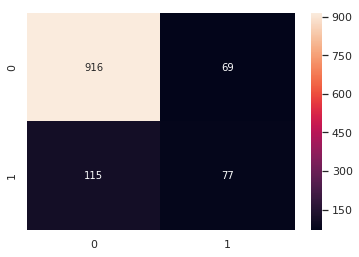

In [159]:
sns.heatmap(cm, annot=True, fmt= "d");

In [160]:
def plot_roc_curve (X_test,y_test):
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
    preds = grid_cv.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
    fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
    roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc = "lower right")
    plt.show()

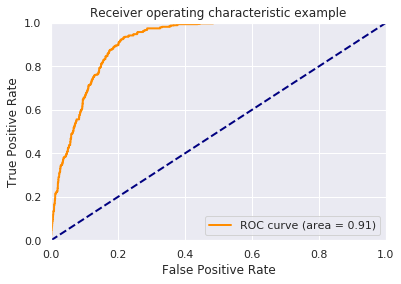

In [161]:
plot_roc_curve (X_train,y_train)

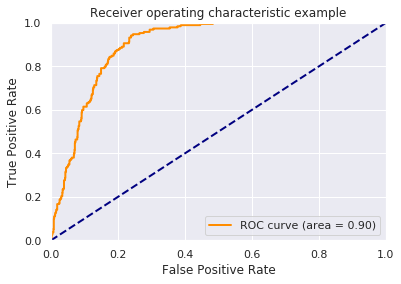

In [162]:
plot_roc_curve (X_test,y_test)

## Deep Learning - Build Artificial Neural Network (ANN)

In [163]:
import tensorflow as tf
from tensorflow import keras
#To randomly initialize the weights to small numbers close to 0
from keras.layers import Dense
from keras.models import Sequential
es=tf.keras.callbacks.EarlyStopping(
    min_delta=0.001,
    patience=10
    
)

Using TensorFlow backend.


In [164]:

ann_model=keras.Sequential([
    keras.layers.Dense(15,input_shape=[10], activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(20,  activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1,activation="sigmoid")
])

print(ann_model.summary())
ann_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

ann_model.summary()
fitted_model =ann_model.fit(X_train, y_train, batch_size = 4, nb_epoch = 100)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                165       
_________________________________________________________________
dropout (Dropout)            (None, 15)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                320       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 506
Trainable params: 506
Non-trainable params: 0
_________________________________________________________________
None
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (

In [165]:
y_pred = ann_model.predict(X_test)
y_pred = (y_pred > 0.5)

In [166]:
print(y_pred)

[[False]
 [ True]
 [False]
 ...
 [False]
 [False]
 [False]]


In [167]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
cm = confusion_matrix(y_test, y_pred)

[[941  44]
 [131  61]]


In [168]:
accuracy_score_test = accuracy_score(y_test, y_pred)

accuracy_score_test

0.8513169073916738

In [169]:
cm = confusion_matrix(y_test, y_pred)

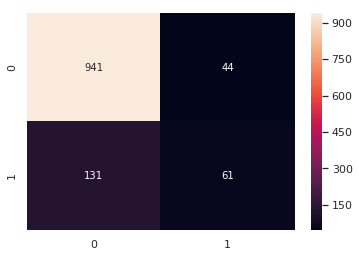

In [170]:
sns.heatmap(cm, annot=True, fmt= "d");

## Parameter tuning- ANN 

In [171]:
ann_model=keras.Sequential([
    keras.layers.Dense(15,input_shape=[10], activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dropout(0.1),
   
    keras.layers.Dense(1,activation="sigmoid")
])

print(ann_model.summary())
ann_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

ann_model.summary()
fitted_model =ann_model.fit(X_train, y_train, batch_size = 4, nb_epoch = 100)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 15)                165       
_________________________________________________________________
dropout_2 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 20)                320       
_________________________________________________________________
dropout_3 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 21        
Total params: 506
Trainable params: 506
Non-trainable params: 0
_________________________________________________________________
None
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3

In [172]:
y_pred = ann_model.predict(X_test)
y_pred = (y_pred > 0.5)
accuracy_score_test = accuracy_score(y_test, y_pred)

accuracy_score_test

0.836873406966865

In [173]:
cm = confusion_matrix(y_test, y_pred)

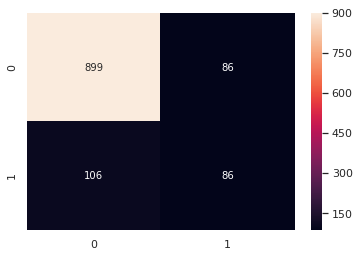

In [174]:
sns.heatmap(cm, annot=True, fmt= "d");

## Feature Selection Method (B) -PCA

In [175]:
# Take all columns except target as predictor columns
predictor_columns = [c for c in Stroke_upsampled.columns if c != 'stroke']
# Load the dataset as a pandas data frame
X = pd.DataFrame(Stroke_upsampled, columns = predictor_columns)




In [176]:
X.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_0', 'gender_1', 'ever_married_0', 'ever_married_1',
       'work_type_0', 'work_type_1', 'work_type_2', 'work_type_3',
       'work_type_4', 'Residence_type_0', 'Residence_type_1',
       'smoking_status_0', 'smoking_status_1', 'smoking_status_2',
       'smoking_status_3'],
      dtype='object')

In [177]:
from sklearn.decomposition import PCA

In [178]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xs = ss.fit_transform(X)

In [179]:
Xs

array([[-1.87593427, -0.36128482, -0.27768008, ..., -0.48421776,
        -0.76329268, -0.42757901],
       [ 0.49787133,  2.76789931, -0.27768008, ..., -0.48421776,
         1.31011344, -0.42757901],
       [-1.66013376, -0.36128482, -0.27768008, ..., -0.48421776,
        -0.76329268, -0.42757901],
       ...,
       [-0.3221706 ,  2.76789931, -0.27768008, ..., -0.48421776,
        -0.76329268,  2.33874902],
       [ 1.31791327, -0.36128482, -0.27768008, ..., -0.48421776,
         1.31011344, -0.42757901],
       [ 0.32523093, -0.36128482, -0.27768008, ..., -0.48421776,
        -0.76329268,  2.33874902]])

In [180]:
correlation_matrix = X.corr()

In [181]:
eigen_values, eigen_vectors = np.linalg.eig(correlation_matrix)
print("Eigenvector: \n",eigen_vectors,"\n")
print("Eigenvalues: \n", eigen_values, "\n")

Eigenvector: 
 [[-4.16064084e-01  5.00666264e-02 -1.27642623e-02 -7.86701057e-01
  -1.35627614e-01 -3.75443685e-01  3.03929638e-02 -5.51821877e-02
  -9.63682884e-02  1.10636810e-01 -8.51253924e-02  3.45523583e-02
  -6.69139089e-02 -8.41728076e-02 -2.16987032e-02  3.03277977e-14
   1.55957546e-14  4.57572809e-16  8.05034110e-16  2.68195612e-16]
 [-1.55213294e-01  4.79787663e-02 -4.92309762e-03  1.24123663e-01
  -1.08826267e-01  3.20676668e-02 -1.18593448e-01 -1.68632945e-01
  -6.44587360e-01 -4.78551376e-01 -2.30188634e-01  3.04639392e-01
   2.09285518e-01  9.94217585e-02 -2.42531685e-01 -9.49711553e-16
  -5.85051492e-16  1.33294343e-16 -2.75378127e-16 -9.01643453e-17]
 [-1.13924985e-01  1.71722079e-01  2.17400021e-02  1.44293624e-01
  -7.87609923e-02  2.40601064e-01  4.05851155e-03 -3.90165216e-01
   1.69046186e-03  6.60263551e-01 -1.26664147e-01  4.22877303e-01
  -1.30101925e-01 -3.60006550e-02 -2.66194332e-01  1.64373780e-16
  -2.67129832e-16 -4.64344337e-17  1.29012408e-16  5.165193

In [182]:
def calculate_cum_var_exp(eig_vals):
    '''
    Calculate Explained Variance from Eigenvalues
    
    Return a list or array containing the cumulative explained variance 
    '''
    
    var_exp = []
    cum_var_exp = []
    

    for i in range(len(eig_vals)):
        exp_var = ((eig_vals[i])/np.sum(eig_vals))*100
        var_exp.append(exp_var) 

    j=0
    for i in range(0,len(var_exp)):
        j += var_exp[i]
        cum_var_exp.append(j)
    
    return cum_var_exp



In [183]:
calculate_cum_var_exp(eigen_values)

[19.77965355542616,
 30.339248301217786,
 40.376755178030834,
 41.66151255188205,
 50.26668397027316,
 52.89274260231993,
 59.9456047843142,
 63.60951505617349,
 67.59335772686826,
 72.13940414325894,
 78.32070759082671,
 84.35280250791155,
 89.20406849304945,
 94.51848811581664,
 99.99999999999993,
 100.00000000000004,
 99.99999999999999,
 99.99999999999999,
 99.99999999999999,
 99.99999999999999]

In [184]:
def plot_var_exp(eig_vals):
    
    cum_var_exp = calculate_cum_var_exp(eig_vals)
    
    plt.figure(figsize=(9,7))

    component_number = [i+1 for i in range(len(cum_var_exp))]

    plt.plot(component_number, cum_var_exp, lw=7)

    plt.axhline(y=0, linewidth=5, color='grey', ls='dashed')
    plt.axhline(y=100, linewidth=3, color='grey', ls='dashed')

    ax = plt.gca()
    ax.set_xlim([1,30])
    ax.set_ylim([-5,105])

    ax.set_ylabel('Cumulative Variance Explained (%)', fontsize=16)
    ax.set_xlabel('No. of Components', fontsize=16)

    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(12) 

    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(12) 

    ax.set_title('Component vs Cumulative Variance Explained\n', fontsize=20)
    plt.show()


In [185]:
eigen_values

array([ 3.95593071e+00,  2.11191895e+00,  2.00750138e+00,  2.56951475e-01,
        1.72103428e+00,  5.25211726e-01,  1.41057244e+00,  7.32782054e-01,
        7.96768534e-01,  9.09209283e-01,  1.23626069e+00,  1.20641898e+00,
        9.70253197e-01,  1.06288392e+00,  1.09630238e+00,  2.16856822e-14,
       -9.95963481e-15,  1.42363201e-16, -3.77852520e-17,  1.41215894e-21])

In [186]:
from sklearn.decomposition import PCA

pca = PCA()
# Fit Xs

pca.fit(Xs)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

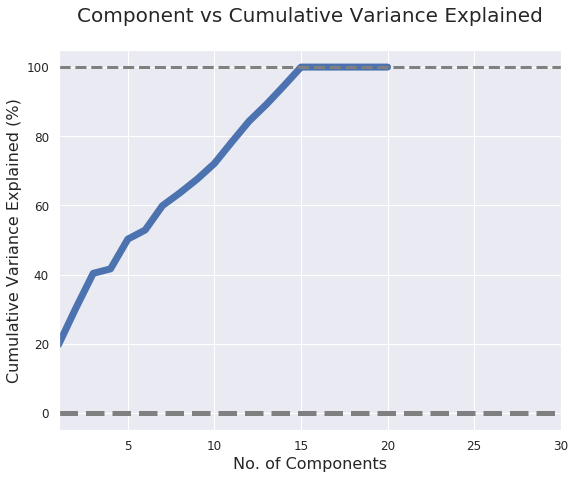

In [187]:
plot_var_exp(eigen_values)

In [188]:
# Apply dimensionality reduction to Xs using transform

pca1 = PCA(n_components=15)
# Fit Xs

pca1.fit(Xs)
pca_X = pca1.fit_transform(Xs)

Essentially 15 predictor columns are essential PCA components to run the analysis.

# Machine Learning Models-PCA components

We will be deploying the following ML techniques of Logistic Regression, KNN, RF, SVM and AdaBoostings to the PCA. We will then proceed to the deep learning alogorithm to compare the performance.

## Logistic Regression 

In [189]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
# Split PCA
X_train1, X_test1, y_train1, y_test1 = train_test_split(pca_X, y, test_size=0.2, random_state=1)

In [190]:
logreg.fit(X_train1,y_train1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Cross-Validation Accuracy Scores [0.82996812 0.83634431 0.84059511 0.82890542 0.82340426]
Accuracy Score 0.8318434440500149
Accuracy Test: 0.8334749362786746
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90       985
         1.0       0.48      0.32      0.39       192

   micro avg       0.83      0.83      0.83      1177
   macro avg       0.68      0.63      0.65      1177
weighted avg       0.81      0.83      0.82      1177



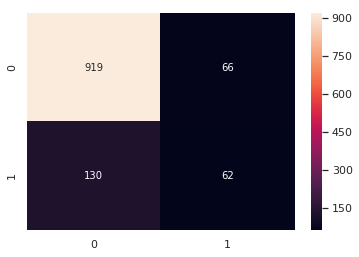

In [191]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, X_train1, y_train1, cv=5)
print('Cross-Validation Accuracy Scores', scores)
print('Accuracy Score',scores.mean())
y_pred1 = logreg.predict(X_test1)
ac = accuracy_score(y_test1, y_pred1)

print ('Accuracy Test:', ac)

cm = confusion_matrix(y_test1, y_pred1)
sns.heatmap(cm, annot=True, fmt = 'd');

print(classification_report(y_test1, y_pred1))

## KNN Classifier

In [192]:
from sklearn.neighbors import KNeighborsClassifier

In [193]:
model_k = KNeighborsClassifier()
model_k.fit(X_train1, y_train1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

Cross-Validation Accuracy Scores [0.8575983  0.84909671 0.8501594  0.8639745  0.84787234]
Accuracy Score for Trainset 0.8537402491690596
Accuracy Test: 0.8623619371282922
              precision    recall  f1-score   support

         0.0       0.93      0.90      0.92       985
         1.0       0.57      0.68      0.62       192

   micro avg       0.86      0.86      0.86      1177
   macro avg       0.75      0.79      0.77      1177
weighted avg       0.87      0.86      0.87      1177



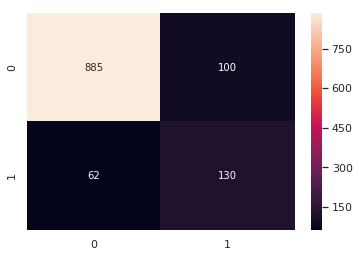

In [194]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_k, X_train1, y_train1, cv=5)
print('Cross-Validation Accuracy Scores', scores)
print('Accuracy Score for Trainset',scores.mean())
y_pred1 = model_k.predict(X_test1)
ac = accuracy_score(y_test1, y_pred1)

print ('Accuracy Test:', ac)

cm = confusion_matrix(y_test1, y_pred1)
sns.heatmap(cm, annot=True, fmt = 'd');

print(classification_report(y_test1, y_pred1))

## SVM 

In [195]:
from sklearn import svm
from sklearn.svm import SVC


In [196]:
svc_model = SVC(kernel = 'linear', probability = True)
svc_model.fit(X_train1,y_train1)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Cross-Validation Accuracy Scores [0.82359192 0.82359192 0.82359192 0.82359192 0.82446809]
Accuracy Score for Trainset 0.8237671558097995
Accuracy Score for Test: 0.836873406966865
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91       985
         1.0       0.00      0.00      0.00       192

   micro avg       0.84      0.84      0.84      1177
   macro avg       0.42      0.50      0.46      1177
weighted avg       0.70      0.84      0.76      1177



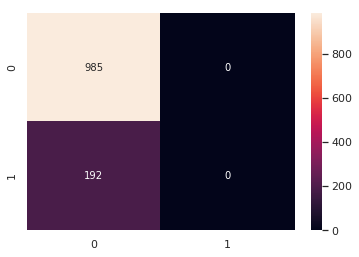

In [197]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svc_model, X_train1, y_train1, cv=5)
print('Cross-Validation Accuracy Scores', scores)
print('Accuracy Score for Trainset',scores.mean())
y_pred1 = svc_model.predict(X_test1)
ac = accuracy_score(y_test1, y_pred1)

print ('Accuracy Score for Test:', ac)

cm = confusion_matrix(y_test1, y_pred1)
sns.heatmap(cm, annot=True, fmt = 'd');

print(classification_report(y_test1, y_pred1))

## Random Forest 

In [198]:
from sklearn.ensemble import RandomForestClassifier
# Create the model 
model_rf = RandomForestClassifier()

In [199]:
model_rf.fit(X_train1,y_train1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [200]:
X_train1.shape

(4704, 15)

In [201]:
y_train1.shape

(4704,)

In [202]:
model_rf.fit(X_train1,y_train1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Cross-Validation Accuracy Scores [0.96068013 0.95855473 0.96599362 0.96918172 0.96276596]
Accuracy Score for Trainset 0.9634352318719334
Accuracy Score for Test: 0.9711129991503823
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98       985
         1.0       0.86      0.98      0.92       192

   micro avg       0.97      0.97      0.97      1177
   macro avg       0.93      0.97      0.95      1177
weighted avg       0.97      0.97      0.97      1177



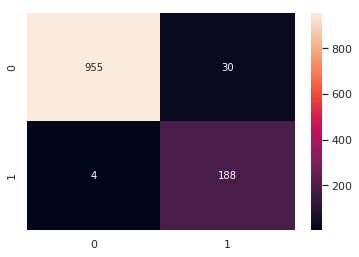

In [203]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_rf, X_train1, y_train1, cv=5)
print('Cross-Validation Accuracy Scores', scores)
print('Accuracy Score for Trainset',scores.mean())
y_pred1 = model_rf.predict(X_test1)
ac = accuracy_score(y_test1, y_pred1)

print ('Accuracy Score for Test:', ac)

cm = confusion_matrix(y_test1, y_pred1)
sns.heatmap(cm, annot=True, fmt = 'd');

print(classification_report(y_test1, y_pred1))

## Boosting 

In [204]:
np.random.seed(0)

In [205]:
from sklearn.ensemble import AdaBoostClassifier

In [206]:
import sklearn
print(sklearn.__version__)

0.20.0


Cross-Validation Accuracy Scores [0.8501594  0.84272051 0.83846971 0.83209352 0.8212766 ]
Accuracy Score for Trainset 0.8369439482668959
Accuracy Score for Test: 0.842820730671198
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91       985
         1.0       0.53      0.37      0.43       192

   micro avg       0.84      0.84      0.84      1177
   macro avg       0.70      0.65      0.67      1177
weighted avg       0.83      0.84      0.83      1177



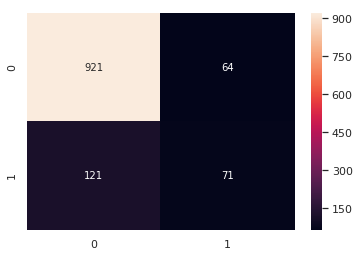

In [207]:
# Import Support Vector Classifier
from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
svc=SVC(probability=True, kernel='linear')



ada_model =AdaBoostClassifier()

ada_model.fit(X_train1, y_train1)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(ada_model, X_train1, y_train1, cv=5)
print('Cross-Validation Accuracy Scores', scores)
print('Accuracy Score for Trainset',scores.mean())
y_pred1 = ada_model.predict(X_test1)
ac = accuracy_score(y_test1, y_pred1)

print ('Accuracy Score for Test:', ac)

cm = confusion_matrix(y_test1, y_pred1)
sns.heatmap(cm, annot=True, fmt = 'd');

print(classification_report(y_test1, y_pred1))

## Evaluation of Machine Learning- PCA trainset 

In [208]:

#consolidation of classifiers

logreg = LogisticRegression(random_state=7, solver='liblinear')
logreg.fit(X_train1, y_train1)
model_k = KNeighborsClassifier()
model_k.fit(X_train1, y_train1)
svc_model = SVC(kernel = 'linear', probability = True)
svc_model.fit(X_train1,y_train1)
model_rf = RandomForestClassifier()
model_rf.fit(X_train1,y_train1)
ada_model =AdaBoostClassifier()

ada_model.fit(X_train1, y_train1)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [209]:
# Evaluate model against training set
def show_summary_report(actual, prediction):

    if isinstance(actual, pd.Series):
        actual = actual.values
    if actual.dtype.name == 'object':
        actual = actual.astype(int)
    if prediction.dtype.name == 'object':
        prediction = prediction.astype(int)

    accuracy_ = accuracy_score(actual, prediction)
    precision_ = precision_score(actual, prediction)
    recall_ = recall_score(actual, prediction)
    roc_auc_ = roc_auc_score(actual, prediction)

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_)
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_)
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_)
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_)
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)
    average_precision = average_precision_score(actual, prediction)
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, prediction)
    roc_auc = auc(fpr, tpr)

    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')
    
    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()
    
    return (accuracy_, precision_, recall_, roc_auc_)
#results in pd df

results1 = pd.DataFrame (columns = ['Model', 'Accuracy', 'Precision','Recall','ROC_AUC'])

*****************
* Logistic_pca *
*****************
Accuracy : 0.8352 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.5590 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.3088 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.6283                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


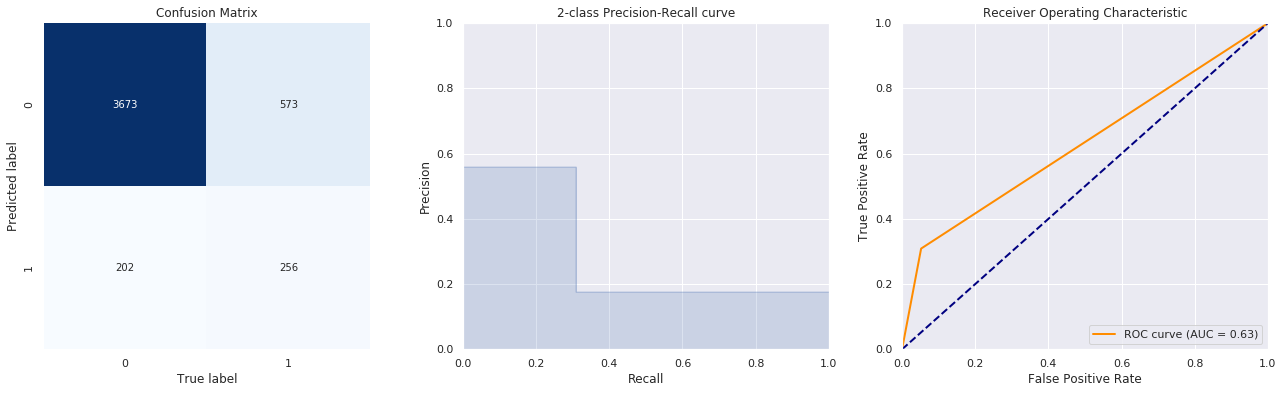

***********************
* KNN Classifier_pca *
***********************
Accuracy : 0.9241 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7327 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8963 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9132                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


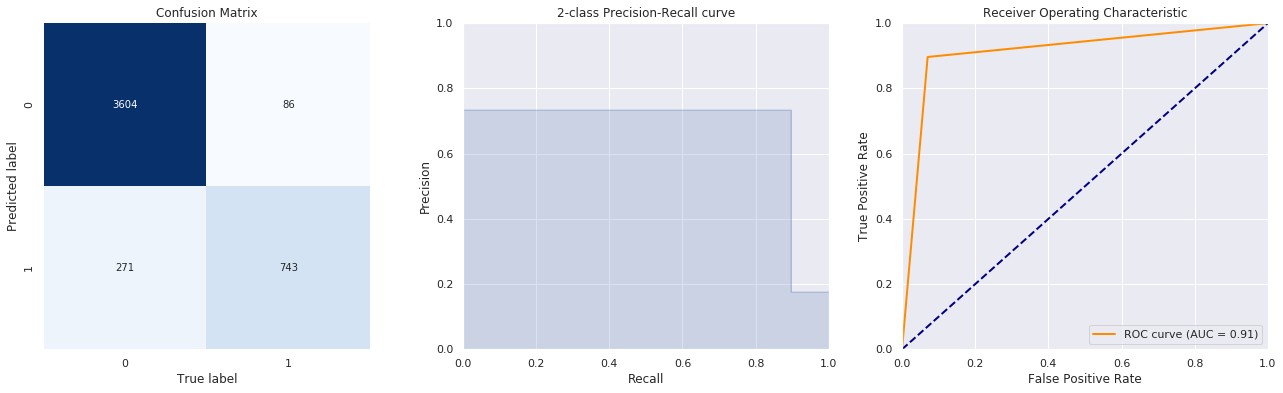

************
* SVM_pca *
************
Accuracy : 0.8238 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.0000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.0000 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.5000                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


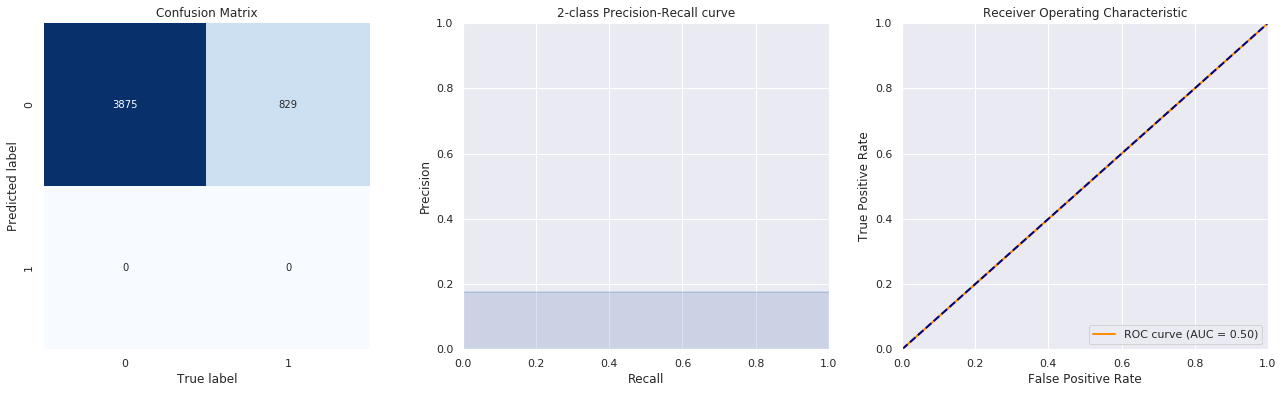

**********************
* Random Forest_pca *
**********************
Accuracy : 0.9991 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9976 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9976 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9985                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


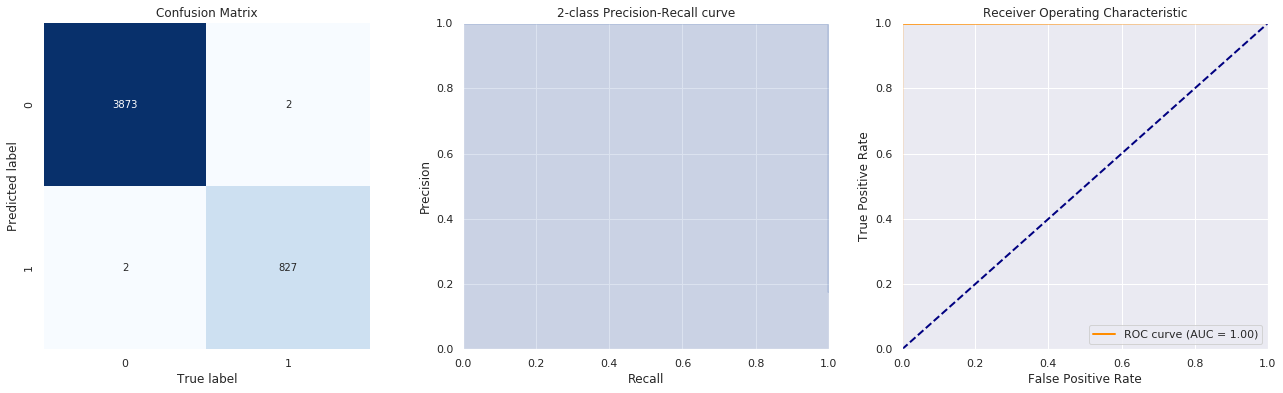

*****************
* Boosting_pca *
*****************
Accuracy : 0.8620 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.6590 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.4499 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7001                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


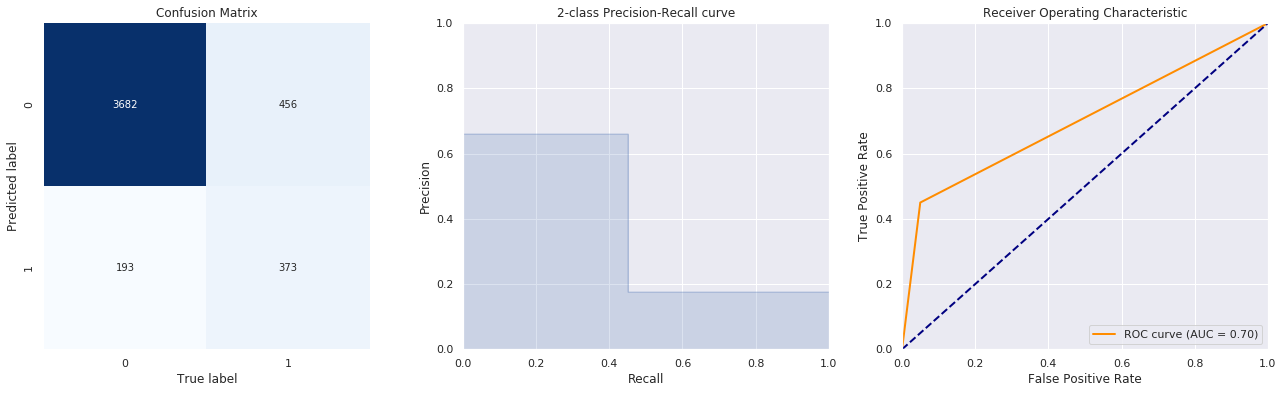

In [210]:

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
models = ['Logistic_pca','KNN Classifier_pca','SVM_pca','Random Forest_pca','Boosting_pca']
for i, m in enumerate ([ logreg,model_k,svc_model,model_rf,ada_model]):
    print('*' * (len(models[i]) + 5))
    print('* %s *' %models[i])
    print('*' * (len(models[i]) + 5))
    predictions = m.predict(X_train1)
    
    #show report
    accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_train1, predictions)
    
    results1.loc[i] = {'Model':models[i],
                  'Accuracy':accuracy_, 
                  'Precision': precision_, 
                  'Recall': recall_, 
                  'ROC_AUC': roc_auc_}

In [211]:
results1

,Model,Accuracy,Precision,Recall,ROC_AUC
0,Logistic_pca,0.835247,0.558952,0.308806,0.628338
1,KNN Classifier_pca,0.924107,0.732742,0.896261,0.913163
2,SVM_pca,0.823767,0.000000,0.000000,0.500000
3,Random Forest_pca,0.999150,0.997587,0.997587,0.998536
4,Boosting_pca,0.862032,0.659011,0.449940,0.700067


## Evaluation of Machine Learning Results- PCA testset 

## Logistic Regression

In [212]:
predictions6 = logreg.predict(X_test1)

Accuracy : 0.8335 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.4844 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.3229 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.6280                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


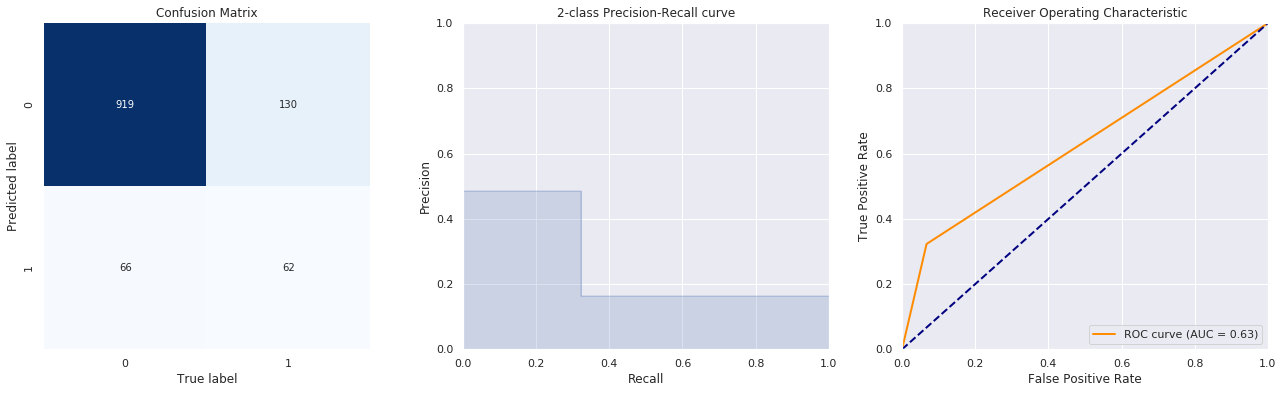

In [213]:
accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_test1, predictions6)

## KNN Classifier 

In [214]:
predictions7 = model_k.predict(X_test1)

Accuracy : 0.8624 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.5652 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.6771 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7878                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


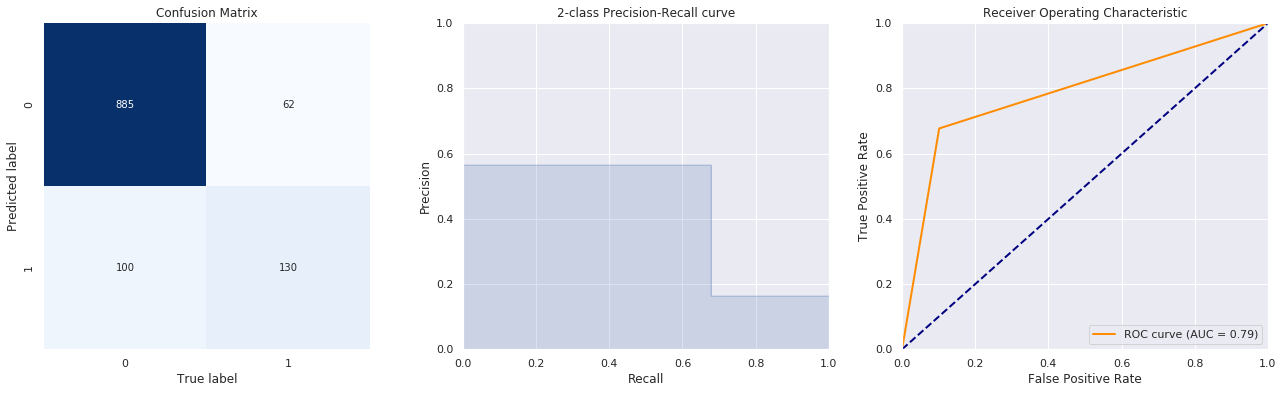

In [215]:
accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_test1, predictions7)

## SVM 

In [216]:
predictions8 = svc_model.predict(X_test1)

Accuracy : 0.8369 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.0000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.0000 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.5000                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


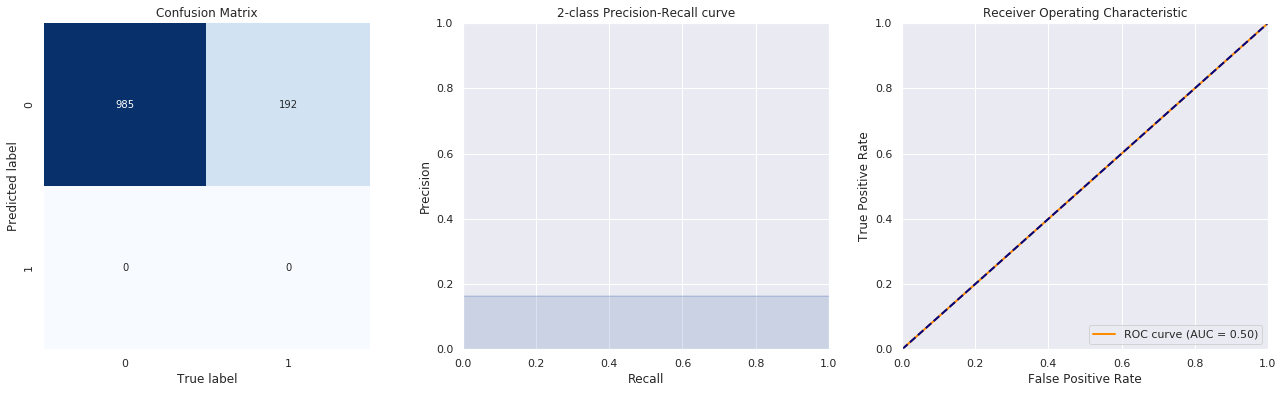

In [217]:
accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_test1, predictions8)

## Random Forest 

In [218]:
predictions9 = model_rf.predict(X_test1)

Accuracy : 0.9728 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8774 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9688 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9712                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


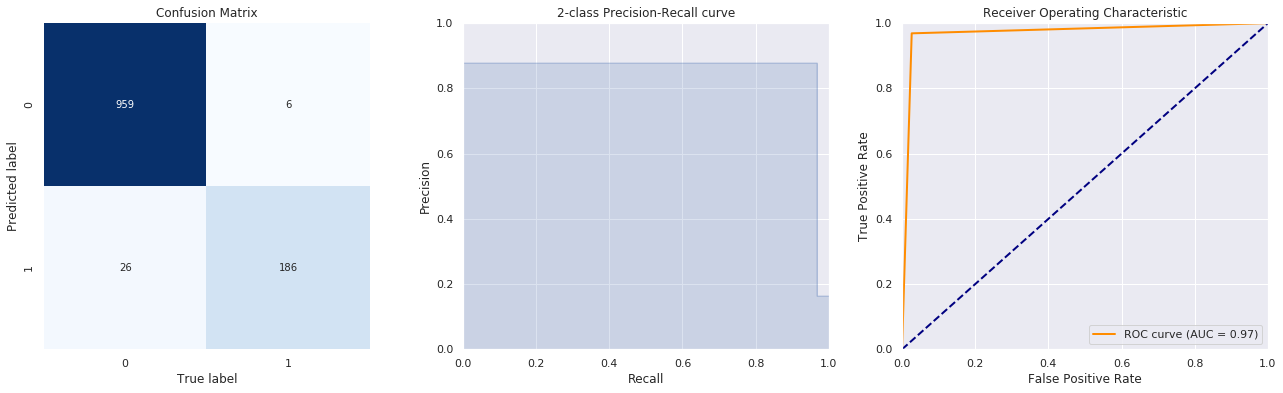

In [219]:
accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_test1, predictions9)

## Boosting 

In [220]:
predictions10 = ada_model.predict(X_test1)

Accuracy : 0.8428 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.5259 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.3698 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.6524                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


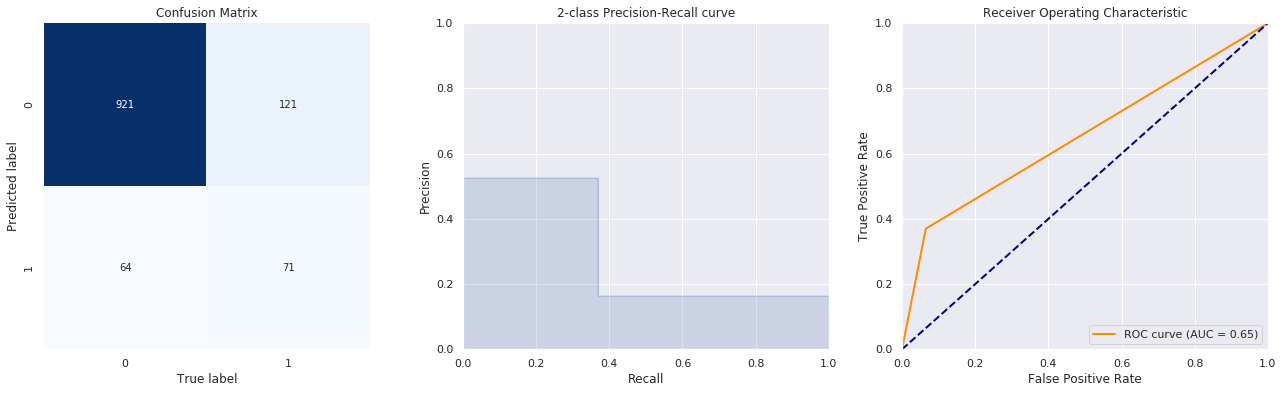

In [221]:
accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_test1, predictions10)

## Hyper parameter tuning- Gridsearch CV for PCA dataset  

### (1) Logistic Regression

In [222]:
from sklearn.model_selection import GridSearchCV
lr_params = {
    'penalty': ['l1','l2'],
    'C': [1, 10, 100]
}
search = GridSearchCV(logreg,lr_params, cv=5)
search.fit(X_train1, y_train1)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=7, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 10, 100], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [223]:
best_logreg = search.best_estimator_
print(search.best_params_)



{'C': 1, 'penalty': 'l2'}


In [224]:

grid_values = {'penalty': ['l2'], 'C': [1]}
grid_log_acc = GridSearchCV(logreg, param_grid = grid_values,scoring = 'accuracy')
grid_log_acc.fit(X_train1, y_train1)

y_pred1 = grid_log_acc.predict(X_train1)

accuracy_score_train = accuracy_score(y_train1, y_pred1)

accuracy_score_train

0.8352465986394558

In [225]:
y_pred_acc = grid_log_acc.predict(X_test1)

accuracy_score_test = accuracy_score(y_test1, y_pred_acc)

accuracy_score_test

0.8334749362786746

In [226]:
cm = confusion_matrix(y_test1, y_pred_acc)

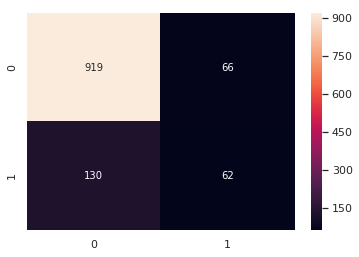

In [227]:
sns.heatmap(cm, annot=True, fmt= "d");

In [228]:
def plot_roc_curve (X_test1,y_test1):
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
    preds = grid_log_acc.predict_proba(X_test1)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
    fpr, tpr, _ = metrics.roc_curve(y_test1, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
    roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc = "lower right")
    plt.show()

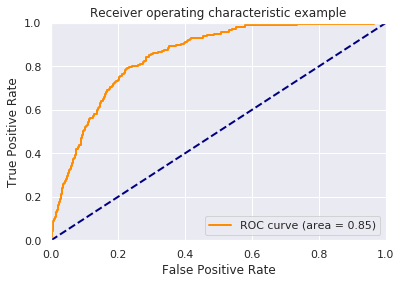

In [229]:
plot_roc_curve (X_train1,y_train1)

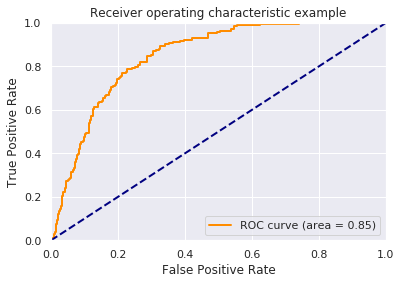

In [230]:
plot_roc_curve (X_test1,y_test1)

### (2) KNN Classifier 

In [231]:
parameters_KNN = {
    'n_neighbors': (1,10),
    'leaf_size': (20,40),
    'p': (1,2)}
search = GridSearchCV(model_k,parameters_KNN, cv=5)
search.fit(X_train1, y_train1)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': (1, 10), 'leaf_size': (20, 40), 'p': (1, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [232]:
best_knn = search.best_estimator_
print(search.best_params_)

{'n_neighbors': 1, 'leaf_size': 20, 'p': 2}


In [233]:
grid_values = {'p': [2], 'n_neighbors': [1], 'leaf_size': [20]}
grid_knn_acc = GridSearchCV(model_k, param_grid = grid_values,scoring = 'accuracy')
grid_knn_acc.fit(X_train1, y_train1)

y_pred = grid_knn_acc.predict(X_train1)

accuracy_score_train = accuracy_score(y_train1, y_pred1)

accuracy_score_train

0.8352465986394558

In [234]:
y_pred_acc = grid_knn_acc.predict(X_test1)

accuracy_score_test = accuracy_score(y_test1, y_pred_acc)

accuracy_score_test

0.9481733220050977

In [235]:
cm = confusion_matrix(y_test1, y_pred_acc)

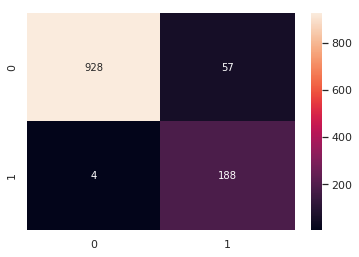

In [236]:
sns.heatmap(cm, annot=True, fmt= "d");

In [237]:
def plot_roc_curve (X_test1,y_test1):
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
    preds = grid_knn_acc.predict_proba(X_test1)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
    fpr, tpr, _ = metrics.roc_curve(y_test1, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
    roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc = "lower right")
    plt.show()

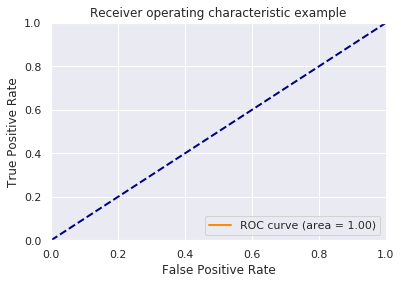

In [238]:
plot_roc_curve (X_train1,y_train1)

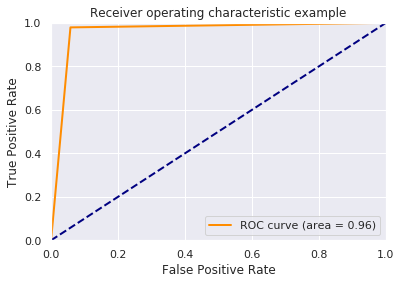

In [239]:
plot_roc_curve (X_test1,y_test1)

### (3) Random Forest 

In [240]:

param_grid = { 
    'n_estimators': [15],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy']
}

In [241]:
%%time

search= GridSearchCV(estimator=model_rf, param_grid=param_grid, cv= 10)
search.fit(X_train1, y_train1)

CPU times: user 8.31 s, sys: 20.1 ms, total: 8.33 s
Wall time: 8.34 s


In [242]:
best_rf = search.best_estimator_
print(search.best_params_)

{'criterion': 'entropy', 'n_estimators': 15, 'max_features': 'log2'}


In [243]:
grid_values = {'max_features': ['sqrt'], 'criterion': ['gini'], 'n_estimators': [15]}
grid_rf_acc = GridSearchCV( model_rf, param_grid = grid_values,scoring = 'recall')
grid_rf_acc.fit(X_train1, y_train1)

y_pred = grid_rf_acc.predict(X_train1)

accuracy_score_train = accuracy_score(y_train1, y_pred)

accuracy_score_train

0.9993622448979592

In [244]:
y_pred_acc = grid_rf_acc.predict(X_test1)

accuracy_score_test = accuracy_score(y_test1, y_pred_acc)

accuracy_score_test

0.967714528462192

In [245]:
cm = confusion_matrix(y_test1, y_pred_acc)

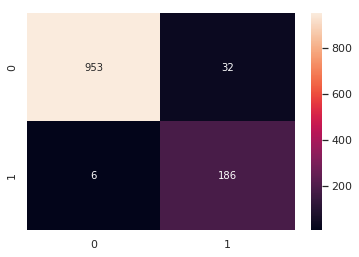

In [246]:
sns.heatmap(cm, annot=True, fmt= "d");

In [247]:
def plot_roc_curve (X_test1,y_test1):
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
    preds = grid_rf_acc.predict_proba(X_test1)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
    fpr, tpr, _ = metrics.roc_curve(y_test1, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
    roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc = "lower right")
    plt.show()

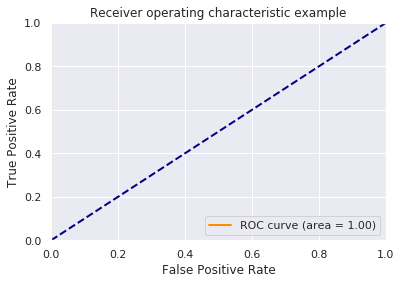

In [248]:
plot_roc_curve (X_train1,y_train1)

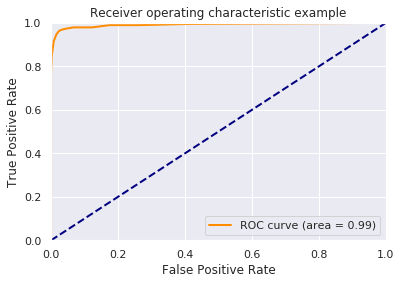

In [249]:
plot_roc_curve (X_test1,y_test1)

### (4) Boosting 

In [250]:
from sklearn.model_selection import GridSearchCV
params = {
     'n_estimators': np.arange(10,300,10),
     'learning_rate': [0.01, 0.05, 0.1, 1],
 }
grid_cv = GridSearchCV(AdaBoostClassifier(), param_grid= params, cv=5, n_jobs=-1)
grid_cv.fit(X_train1,y_train1)
grid_cv.best_params_

y_pred = grid_cv.predict(X_train1)

accuracy_score_train = accuracy_score(y_train1, y_pred)

accuracy_score_train

0.9355867346938775

In [251]:
y_pred_acc = grid_cv.predict(X_test1)

accuracy_score_test = accuracy_score(y_test1, y_pred_acc)

accuracy_score_test

0.8954970263381479

In [252]:
cm = confusion_matrix(y_test1, y_pred_acc)

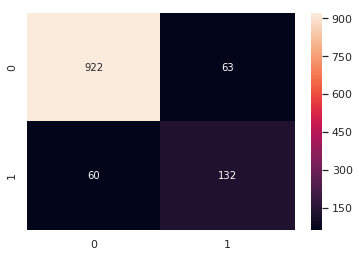

In [253]:
sns.heatmap(cm, annot=True, fmt= "d");

In [254]:
def plot_roc_curve (X_test1,y_test1):
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
    preds = grid_cv.predict_proba(X_test1)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
    fpr, tpr, _ = metrics.roc_curve(y_test1, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
    roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc = "lower right")
    plt.show()

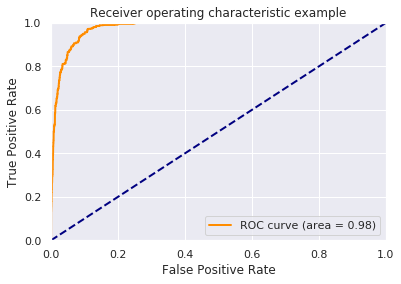

In [255]:
plot_roc_curve (X_train1,y_train1)

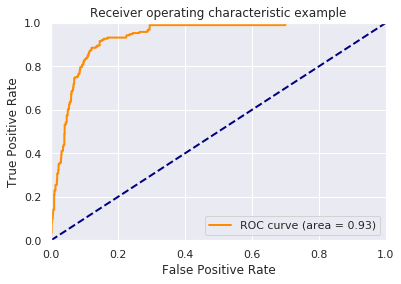

In [256]:
plot_roc_curve (X_test1,y_test1)

# Deep Learning- Artifical Neural Network

In [257]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
es=tf.keras.callbacks.EarlyStopping(
    min_delta=0.001,
    patience=10
    
)

In [258]:

ann_model=keras.Sequential([
    keras.layers.Dense(15,input_shape=[15], activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(20, input_shape=[15],activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1,activation="sigmoid")
])
ann_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

ann_model.fit(X_train1, y_train1, batch_size = 4, nb_epoch = 100)

Epoch 1/100
4704/4704 [==============================] - 2s 514us/step - loss: 0.4214 - acc: 0.8187
Epoch 2/100
4704/4704 [==============================] - 2s 439us/step - loss: 0.3683 - acc: 0.8253
Epoch 3/100
4704/4704 [==============================] - 3s 555us/step - loss: 0.3528 - acc: 0.8340
Epoch 4/100
4704/4704 [==============================] - 4s 768us/step - loss: 0.3448 - acc: 0.8365
Epoch 5/100
4704/4704 [==============================] - 3s 553us/step - loss: 0.3455 - acc: 0.8399
Epoch 6/100
4704/4704 [==============================] - 2s 493us/step - loss: 0.3394 - acc: 0.8425
Epoch 7/100
4704/4704 [==============================] - 2s 508us/step - loss: 0.3396 - acc: 0.8372
Epoch 8/100
4704/4704 [==============================] - 2s 521us/step - loss: 0.3343 - acc: 0.8435
Epoch 9/100
4704/4704 [==============================] - 2s 505us/step - loss: 0.3302 - acc: 0.8455
Epoch 10/100
4704/4704 [==============================] - 3s 551us/step - loss: 0.3354 - acc: 0.8423

In [259]:
y_pred = ann_model.predict(X_test1)
y_pred = (y_pred > 0.5)

In [260]:
print(y_pred)

[[False]
 [False]
 [ True]
 ...
 [False]
 [False]
 [False]]


This Model when trained on the train data and when tested on the test data gives us an accuracy of around 86% in both of the cases

In [261]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test1, y_pred)
print(cm)
cm = confusion_matrix(y_test1, y_pred)

[[921  64]
 [ 97  95]]


In [262]:
accuracy_score_test = accuracy_score(y_test1, y_pred)

accuracy_score_test

0.8632115548003398

In [263]:
cm = confusion_matrix(y_test1, y_pred)

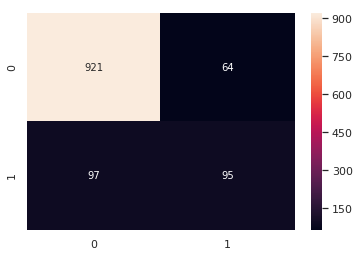

In [264]:
sns.heatmap(cm, annot=True, fmt= "d");

## Hyperparameter Tuning - Deep Learning 

We can tune certain parameters in deep learning algorithm. Batch Size number of patterns shown to the network before the weight matrix is updated.If size is is high learning would become slow as only after many iterations will the batch size change. It is recommended to try out batch sizes for better memory optimization.
We can try different number of epochs to show the training data to NN model.  High number of epochs may over-fit to the data and may have generalization problems on the test and validation set. Lower number of epochs may limit the potential of the model. 
We can try adjusting the Dropout rate. The rate could act as a regularizer to help us find the optimum bias-variance spot. It does so by removing certain connections every iteration therefore the hidden units cannot depend a lot on any particular feature. The values it can take can be anywhere between 0–1 and it is solely based on how much is the model over-fitting.

### Adjust batch size 

In [265]:

ann_model=keras.Sequential([
    keras.layers.Dense(15,input_shape=[15], activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(20, input_shape=[15],activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1,activation="sigmoid")
])
ann_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

ann_model.fit(X_train1, y_train1, batch_size = 10, nb_epoch = 100)
y_pred = ann_model.predict(X_test1)
y_pred = (y_pred > 0.5)
print(y_pred)

Epoch 1/100
4704/4704 [==============================] - 2s 439us/step - loss: 0.5248 - acc: 0.7611
Epoch 2/100
4704/4704 [==============================] - 1s 211us/step - loss: 0.3941 - acc: 0.8229 0s - loss: 0.4063 - a
Epoch 3/100
4704/4704 [==============================] - 1s 195us/step - loss: 0.3701 - acc: 0.8314
Epoch 4/100
4704/4704 [==============================] - 1s 196us/step - loss: 0.3593 - acc: 0.8308
Epoch 5/100
4704/4704 [==============================] - 1s 198us/step - loss: 0.3542 - acc: 0.8301
Epoch 6/100
4704/4704 [==============================] - 1s 201us/step - loss: 0.3494 - acc: 0.8346
Epoch 7/100
4704/4704 [==============================] - 1s 201us/step - loss: 0.3482 - acc: 0.8372
Epoch 8/100
4704/4704 [==============================] - 1s 194us/step - loss: 0.3430 - acc: 0.8386
Epoch 9/100
4704/4704 [==============================] - 1s 199us/step - loss: 0.3402 - acc: 0.8427
Epoch 10/100
4704/4704 [==============================] - 1s 196us/step - loss

In [266]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test1, y_pred)
print(cm)
cm = confusion_matrix(y_test1, y_pred)

[[926  59]
 [107  85]]


In [267]:
accuracy_score_test = accuracy_score(y_test1, y_pred)

accuracy_score_test

0.8589634664401019

In [268]:
cm = confusion_matrix(y_test1, y_pred)

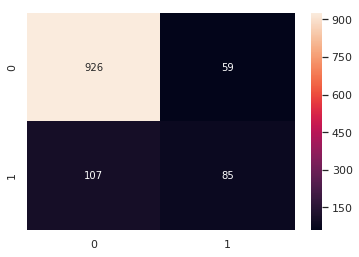

In [269]:
sns.heatmap(cm, annot=True, fmt= "d");

### Adjust epoch size 

In [270]:

ann_model=keras.Sequential([
    keras.layers.Dense(100,input_shape=[15], activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(200, input_shape=[15],activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1,activation="sigmoid")
])
ann_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

ann_model.fit(X_train1, y_train1, batch_size = 4, nb_epoch = 150)
y_pred = ann_model.predict(X_test1)
y_pred = (y_pred > 0.5)
print(y_pred)

Epoch 1/150
4704/4704 [==============================] - 4s 862us/step - loss: 0.3708 - acc: 0.8308
Epoch 2/150
4704/4704 [==============================] - 3s 703us/step - loss: 0.3326 - acc: 0.8446
Epoch 3/150
4704/4704 [==============================] - 3s 706us/step - loss: 0.3177 - acc: 0.8476
Epoch 4/150
4704/4704 [==============================] - 4s 749us/step - loss: 0.3187 - acc: 0.8518
Epoch 5/150
4704/4704 [==============================] - 4s 757us/step - loss: 0.3031 - acc: 0.8571
Epoch 6/150
4704/4704 [==============================] - 4s 764us/step - loss: 0.2975 - acc: 0.8614
Epoch 7/150
4704/4704 [==============================] - 4s 763us/step - loss: 0.2897 - acc: 0.8665
Epoch 8/150
4704/4704 [==============================] - 4s 790us/step - loss: 0.2761 - acc: 0.8756
Epoch 9/150
4704/4704 [==============================] - 4s 763us/step - loss: 0.2731 - acc: 0.8739
Epoch 10/150
4704/4704 [==============================] - 4s 783us/step - loss: 0.2700 - acc: 0.8784

In [271]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test1, y_pred)
print(cm)
cm = confusion_matrix(y_test1, y_pred)

[[923  62]
 [ 12 180]]


In [272]:
accuracy_score_test = accuracy_score(y_test1, y_pred)

accuracy_score_test

0.9371282922684792

In [273]:
cm = confusion_matrix(y_test1, y_pred)

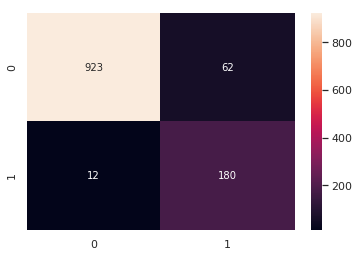

In [274]:
sns.heatmap(cm, annot=True, fmt= "d");

We can try to reduce the epoch runs to 50 to study the system performance.

In [275]:
ann_model=keras.Sequential([
    keras.layers.Dense(10,input_shape=[15], activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(20, input_shape=[15],activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1,activation="sigmoid")
])
ann_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

ann_model.fit(X_train1, y_train1, batch_size = 4, nb_epoch = 50)
y_pred = ann_model.predict(X_test1)
y_pred = (y_pred > 0.5)
print(y_pred)

Epoch 1/50
4704/4704 [==============================] - 3s 699us/step - loss: 0.4298 - acc: 0.8121
Epoch 2/50
4704/4704 [==============================] - 2s 482us/step - loss: 0.3745 - acc: 0.8265
Epoch 3/50
4704/4704 [==============================] - 2s 468us/step - loss: 0.3620 - acc: 0.8297
Epoch 4/50
4704/4704 [==============================] - 2s 474us/step - loss: 0.3553 - acc: 0.8306
Epoch 5/50
4704/4704 [==============================] - 2s 490us/step - loss: 0.3498 - acc: 0.8318
Epoch 6/50
4704/4704 [==============================] - 3s 558us/step - loss: 0.3440 - acc: 0.8361
Epoch 7/50
4704/4704 [==============================] - 3s 574us/step - loss: 0.3455 - acc: 0.8369
Epoch 8/50
4704/4704 [==============================] - 3s 722us/step - loss: 0.3418 - acc: 0.8376
Epoch 9/50
4704/4704 [==============================] - 2s 521us/step - loss: 0.3381 - acc: 0.8393
Epoch 10/50
4704/4704 [==============================] - 2s 498us/step - loss: 0.3362 - acc: 0.8389
Epoch 11/

In [276]:
accuracy_score_test = accuracy_score(y_test1, y_pred)

accuracy_score_test

0.8504672897196262

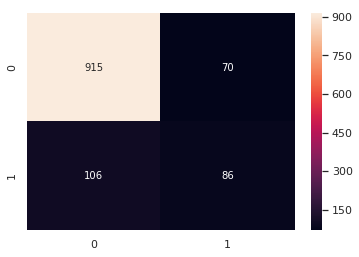

In [277]:
cm = confusion_matrix(y_test1, y_pred)
sns.heatmap(cm, annot=True, fmt= "d");

### Adjust drop out rate 

In [278]:
ann_model=keras.Sequential([
    keras.layers.Dense(10,input_shape=[15], activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(20, input_shape=[15],activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1,activation="sigmoid")
])
ann_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

ann_model.fit(X_train1, y_train1, batch_size = 4, nb_epoch = 100)
y_pred = ann_model.predict(X_test1)
y_pred = (y_pred > 0.5)
print(y_pred)

Epoch 1/100
4704/4704 [==============================] - 3s 698us/step - loss: 0.4342 - acc: 0.8146
Epoch 2/100
4704/4704 [==============================] - 2s 473us/step - loss: 0.3747 - acc: 0.8216
Epoch 3/100
4704/4704 [==============================] - 2s 449us/step - loss: 0.3593 - acc: 0.8321
Epoch 4/100
4704/4704 [==============================] - 2s 442us/step - loss: 0.3464 - acc: 0.8363
Epoch 5/100
4704/4704 [==============================] - 2s 443us/step - loss: 0.3439 - acc: 0.8365
Epoch 6/100
4704/4704 [==============================] - 2s 449us/step - loss: 0.3428 - acc: 0.8367
Epoch 7/100
4704/4704 [==============================] - 2s 471us/step - loss: 0.3367 - acc: 0.8403
Epoch 8/100
4704/4704 [==============================] - 2s 464us/step - loss: 0.3379 - acc: 0.8397
Epoch 9/100
4704/4704 [==============================] - 2s 436us/step - loss: 0.3341 - acc: 0.8459
Epoch 10/100
4704/4704 [==============================] - 2s 444us/step - loss: 0.3326 - acc: 0.8480

In [279]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test1, y_pred)
print(cm)
cm = confusion_matrix(y_test1, y_pred)

[[908  77]
 [ 80 112]]


In [280]:
accuracy_score_test = accuracy_score(y_test1, y_pred)

accuracy_score_test

0.8666100254885302

In [281]:
cm = confusion_matrix(y_test1, y_pred)

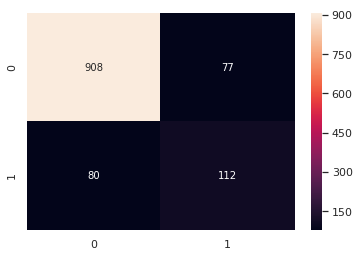

In [282]:
sns.heatmap(cm, annot=True, fmt= "d");

Seems like parameter tuning to existing layers and models didnt help much.

# Summary of Test Results 

In [283]:
results = {
    'Logreg' : [accuracy_score(y_test, predictions1), precision_score(y_test, predictions1), recall_score(y_test, predictions1), roc_auc_score(y_test, predictions1)],
    'KNN': [accuracy_score(y_test, predictions2), precision_score(y_test, predictions2), recall_score(y_test, predictions2), roc_auc_score(y_test, predictions2)],
    'SVM': [accuracy_score(y_test, predictions3), precision_score(y_test, predictions3), recall_score(y_test, predictions3), roc_auc_score(y_test, predictions3)],
    'RF': [accuracy_score(y_test, predictions4), precision_score(y_test, predictions4), recall_score(y_test, predictions4), roc_auc_score(y_test, predictions4)],
    'Boost': [accuracy_score(y_test, predictions5), precision_score(y_test, predictions5), recall_score(y_test, predictions5), roc_auc_score(y_test, predictions5)],
    'Logreg_pca': [accuracy_score(y_test1, predictions6), precision_score(y_test1, predictions6), recall_score(y_test1, predictions6), roc_auc_score(y_test1, predictions6)],
    'KNN_pca': [accuracy_score(y_test1, predictions7), precision_score(y_test1, predictions7), recall_score(y_test1, predictions7), roc_auc_score(y_test1, predictions7)],
    'SVM_pca': [accuracy_score(y_test1, predictions8), precision_score(y_test1, predictions8), recall_score(y_test1, predictions8), roc_auc_score(y_test1, predictions8)],
    'RF_pca': [accuracy_score(y_test1, predictions9), precision_score(y_test1, predictions9), recall_score(y_test1, predictions9), roc_auc_score(y_test1, predictions9)],
    'Boost_pca': [accuracy_score(y_test1, predictions10), precision_score(y_test1, predictions10), recall_score(y_test1, predictions10), roc_auc_score(y_test1, predictions10)]
 
        
}    

scores = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'ROC_AUC'] , columns=['Logreg','KNN', 'SVM', 'RF', 'Boost', 'Logreg_pca', 'KNN_pca', 'SVM_pca', 'RF_pca', 'Boost_pca'])
scores

,Logreg,KNN,SVM,RF,Boost,Logreg_pca,KNN_pca,SVM_pca,RF_pca,Boost_pca
Accuracy,0.836873,0.856415,0.836873,0.976211,0.837723,0.833475,0.862362,0.836873,0.972812,0.842821
Precision,0.500000,0.543071,0.000000,0.890476,0.503546,0.484375,0.565217,0.000000,0.877358,0.525926
Recall,0.291667,0.755208,0.000000,0.973958,0.369792,0.322917,0.677083,0.000000,0.968750,0.369792
ROC_AUC,0.617407,0.815675,0.500000,0.975304,0.649363,0.627956,0.787780,0.500000,0.971177,0.652409


# Conclusion

Resamping to equal proportions didn't alter much of our earlier findings.

Kaggle Dataset credits to:  https://www.kaggle.com/fedesoriano
Kaggle userid (author): fedesoriano

https://www.ninds.nih.gov/Disorders/All-Disorders/Stroke-Information-Page

http://rasbt.github.io/mlxtend/user_guide/classifier/StackingCVClassifier/

https://towardsdatascience.com/building-your-own-artificial-neural-network-from-scratch-on-churn-modeling-dataset-using-keras-in-690782f7d051

https://towardsdatascience.com/a-guide-to-an-efficient-way-to-build-neural-network-architectures-part-i-hyper-parameter-8129009f131b